Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',300)

Reading the data into a dataframe from the csv

In [3]:
df_loan = pd.read_csv('loan.csv', low_memory = False)

In [4]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df_loan.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [6]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Data Cleaning

Missing Values

In [7]:
df_missing = df_loan.isnull().sum()

In [8]:
# Count columns with all nulls
df_missing.loc[(df_missing.values == 39717)].count()

54

In [9]:
#54 columns will all nulls. We will drop these
df_missing.loc[(df_missing.values == 39717)]

mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717
acc_open_past_24mths              39717
avg_cur_bal                       39717
bc_open_to_buy                    39717
bc_util                           39717


In [10]:
df_loan_new = df_loan.dropna(how='all', axis = 1)
df_loan_new.shape

(39717, 57)

In [11]:
#54 columns dropped
#Now we drop columns will more than 40% nulls(more than ~ 15k)
df_max_nulls = df_missing.loc[(df_missing.values > 15000) & (df_missing.values < 39717)]
df_max_nulls

mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [12]:
# Drop these 3 additional columns
df_loan_new.drop(columns = list(df_max_nulls.index), inplace = True)
df_loan_new.shape

(39717, 54)

In [13]:
#Check for columns with one distinct value. Can be removed
loan_distinct = df_loan_new.nunique()
loan_distinct

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [14]:
#Drop columns with distinct 1 value (9 columns)
df_loan_new.drop(columns = list(loan_distinct[loan_distinct.values == 1].index), inplace = True)
df_loan_new.shape

(39717, 45)

In [15]:
df_loan_new.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [16]:
df_loan_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [17]:
#id columns and post loan approval information about individual can be ignored and deleted. 
#Will not contribute to the risk analysis
ignore_cols = ["id", "member_id", "url","zip_code","out_prncp", "out_prncp_inv", "total_pymnt"
               ,"total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries"
               ,"collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"
            ]

In [18]:
df_loan_new.drop(columns=ignore_cols, inplace = True)
df_loan_new.shape

(39717, 29)

In [19]:
df_loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  desc               

In [20]:
# Checking how many are paid vs defaulters. Open loans can be ignored
df_loan_new.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [21]:
df_loan_closed = df_loan_new[df_loan_new.loan_status != "Current"]

In [22]:
df_loan_closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  desc               

In [23]:
df_loan_closed.emp_title.value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [24]:
#Check for datatypes vs column values. Any numerical columns with categorical datatypes
df_loan_closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  desc               

In [25]:
df_loan_closed.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [26]:
df_loan_closed.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [27]:
df_loan_closed.earliest_cr_line.value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [28]:
df_loan_closed.revol_util.value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

In [29]:
df_loan_closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  desc               

In [30]:
#int_rate and revol_util can be changed to numerical without the %
df_loan_closed.int_rate = pd.to_numeric(df_loan_closed.int_rate.str.rstrip("%"))
df_loan_closed.revol_util = pd.to_numeric(df_loan_closed.revol_util.str.rstrip("%"))
df_loan_closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  desc               

In [31]:
df_loan_closed.loan_amnt.value_counts()

10000    2809
12000    2248
5000     2028
6000     1886
15000    1838
         ... 
18325       1
9650        1
20450       1
15425       1
22550       1
Name: loan_amnt, Length: 870, dtype: int64

In [35]:
#dropping desc since many nulls and cant be imputed. Plus not much information can be derived
df_loan_closed = df_loan_closed.drop(['desc'],axis =1 )

In [36]:
df_loan_closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [52]:
#The percentage of the rest of the missing values is not much so we can ignore for now.
df_loan_closed.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [274]:
df_loan_closed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0


In [275]:
#Extracting year from issue_d and earliest_cr_line
df_loan_closed.issue_d.unique()
df_loan_closed['issue_month_c'] = df_loan_closed['issue_d'].str.partition("-",True)[0]
df_loan_closed['issue_year_c'] = df_loan_closed['issue_d'].str.partition("-",True)[2]
df_loan_closed['earliest_cr_line_month_c'] = df_loan_closed['earliest_cr_line'].str.partition("-",True)[0]
df_loan_closed['earliest_cr_line_year_c'] = df_loan_closed['earliest_cr_line'].str.partition("-",True)[2]
df_loan_closed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month_c,issue_year_c,earliest_cr_line_month_c,earliest_cr_line_year_c
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.0,Dec,11,Jan,85
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0,Dec,11,Apr,99
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.0,Dec,11,Nov,01
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0,Dec,11,Feb,96
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0,Dec,11,Nov,04


In [276]:
df_loan_closed.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

## Target Column - loan_status
### List of Categorical Columns
1. installment
2. term
3. grade
4. sub_grade
5. emp_title - ignored (high cardinality)
6. emp_length 
7. home_ownership
8. verification_status
9. purpose
10. title - ignored (high cardinality)
11. addr_state
12. earliest_cr_line - year and month extracted
13. issue_d - year and month extracted
14.pub_rec_bankruptcies
15.pub_rec

<Axes: >

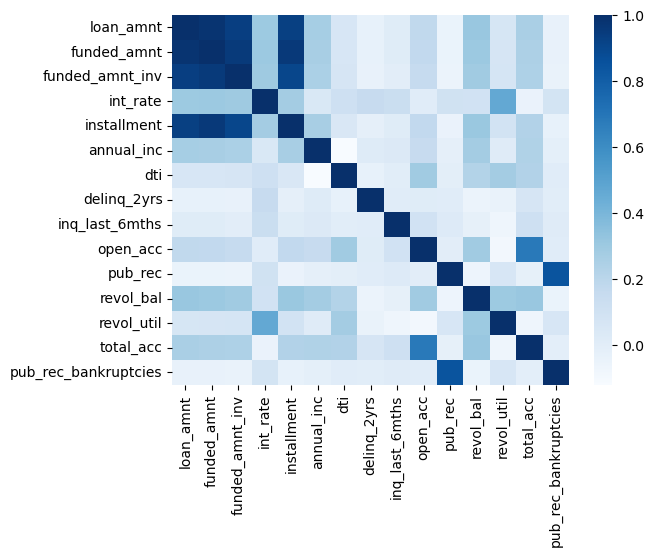

In [277]:
#Checking for correlation
sns.heatmap(data = df_loan_closed.corr(), cmap = 'Blues')

In [278]:
df_loan_closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 38577 non-null  int64  
 1   funded_amnt               38577 non-null  int64  
 2   funded_amnt_inv           38577 non-null  float64
 3   term                      38577 non-null  object 
 4   int_rate                  38577 non-null  float64
 5   installment               38577 non-null  float64
 6   grade                     38577 non-null  object 
 7   sub_grade                 38577 non-null  object 
 8   emp_title                 36191 non-null  object 
 9   emp_length                37544 non-null  object 
 10  home_ownership            38577 non-null  object 
 11  annual_inc                38577 non-null  float64
 12  verification_status       38577 non-null  object 
 13  issue_d                   38577 non-null  object 
 14  loan_s

In [279]:
#Expected columns are highly correlated, for eg loan_amnt with funded_amnt and funded_amnt_inv and installment
# pub_rec and pub_rec_bankrupcies

<Axes: xlabel='loan_status', ylabel='count'>

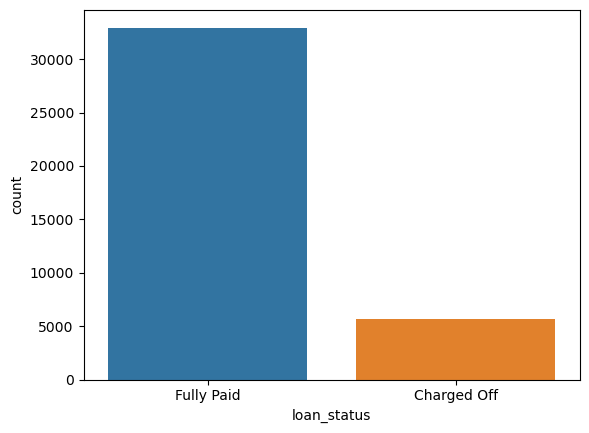

In [280]:
# categorical data
sns.countplot(x = 'loan_status', data = df_loan_closed)

In [281]:
# Function for Categorical Analysis against Loan Status
def uni_cat_analysis(cat_col):
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.countplot(x = cat_col,hue ='loan_status', data = df_loan_closed)
    plt.show()
    df_per = df_loan_closed.groupby([cat_col]).loan_status.value_counts(normalize = True).mul(100).rename('Defaulter%').reset_index()
    df_per =  df_per.loc[df_per['loan_status'] == 'Charged Off'].sort_values('Defaulter%', ascending = False)
    df_cnt = df_loan_closed.groupby([cat_col]).loan_status.count().rename('tot_count')
    df = df_per.merge(right = df_cnt, on = cat_col)
    df = df.drop(['loan_status'],axis =1 )
    display(df)

In [421]:
# Function for Categorical Analysis against Loan Status without the plot
def uni_cat_analysis_no_plot(cat_col):
    df_per = df_loan_closed.groupby([cat_col]).loan_status.value_counts(normalize = True).mul(100).rename('Defaulter%').reset_index()
    df_per =  df_per.loc[df_per['loan_status'] == 'Charged Off'].sort_values('Defaulter%', ascending = False)
    df_cnt = df_loan_closed.groupby([cat_col]).loan_status.count().rename('tot_count')
    df = df_per.merge(right = df_cnt, on = cat_col)
    df = df.drop(['loan_status'],axis =1)
    display(df)

### Term

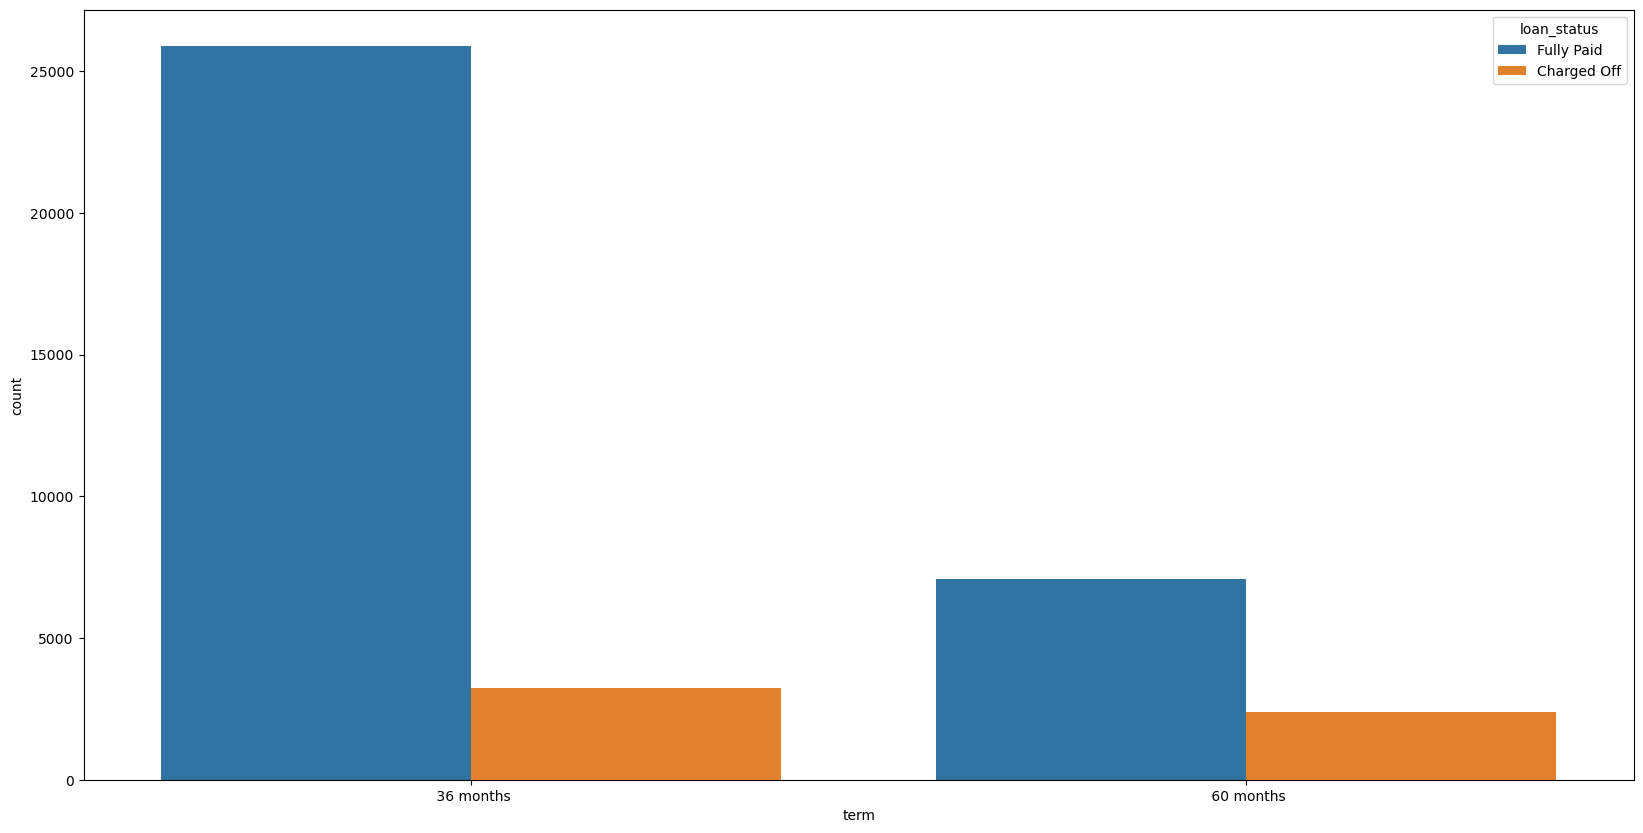

,term,Defaulter%,tot_count
0,60 months,25.313785,9481
1,36 months,11.090872,29096


In [283]:
uni_cat_analysis('term')

Observation - Higher Loan Term has higher number of defaulters

### Grade

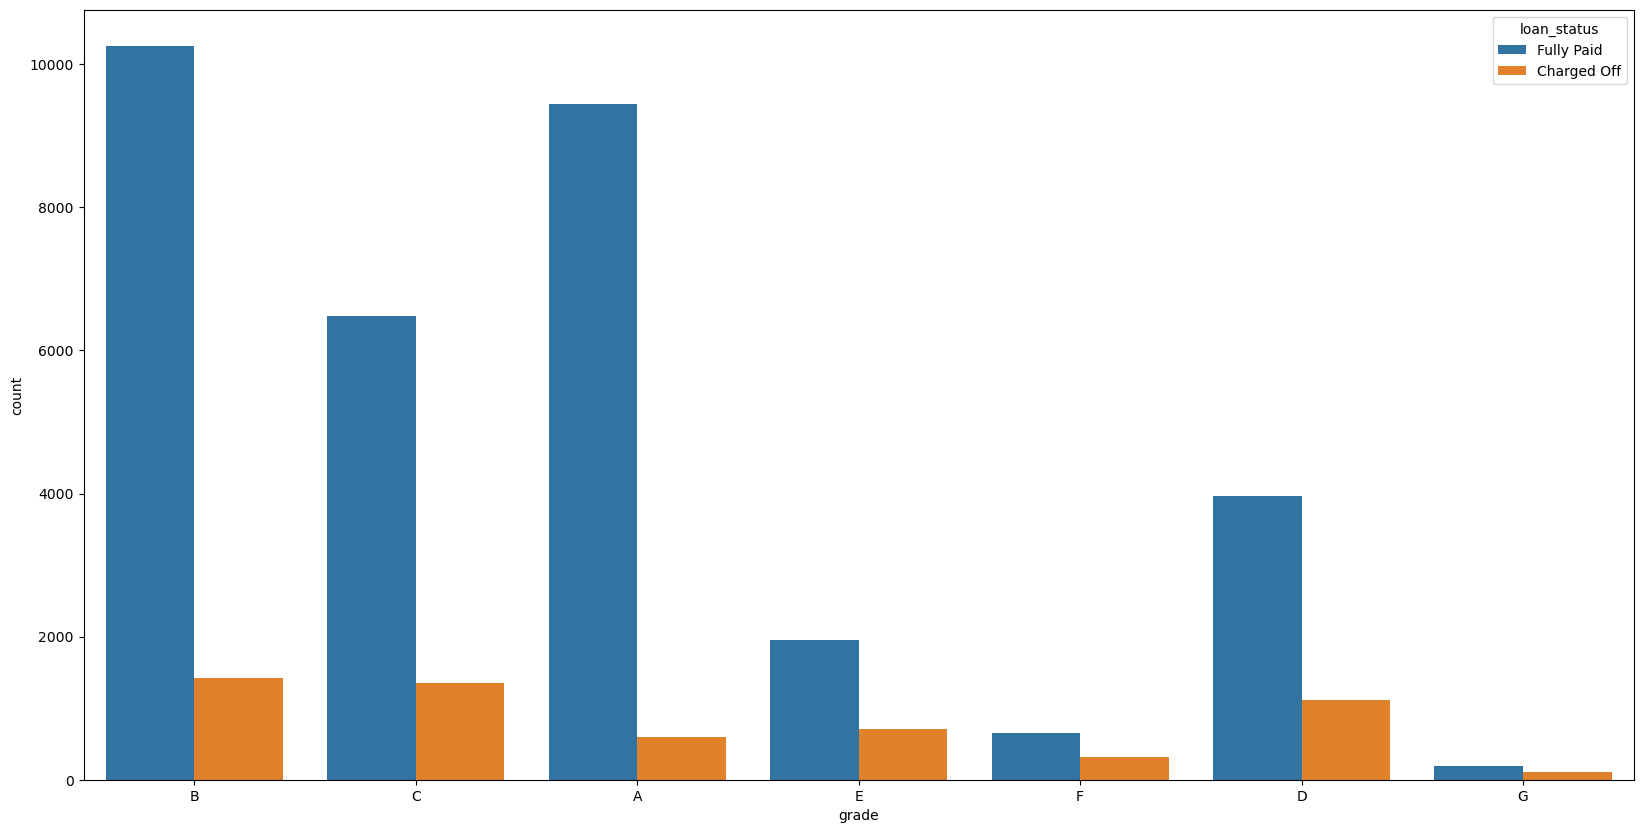

,grade,Defaulter%,tot_count
0,G,33.779264,299
1,F,32.684426,976
2,E,26.849418,2663
3,D,21.986234,5085
4,C,17.194281,7834
5,B,12.205567,11675
6,A,5.993031,10045


In [284]:
uni_cat_analysis('grade')

Observation: Grade of Loan is certainly linked with higher defaulters. Defaulter % continuously increases from A to G with D,E,F,G being risky grades. Lower grade loan is less risk

### Sub-Grade

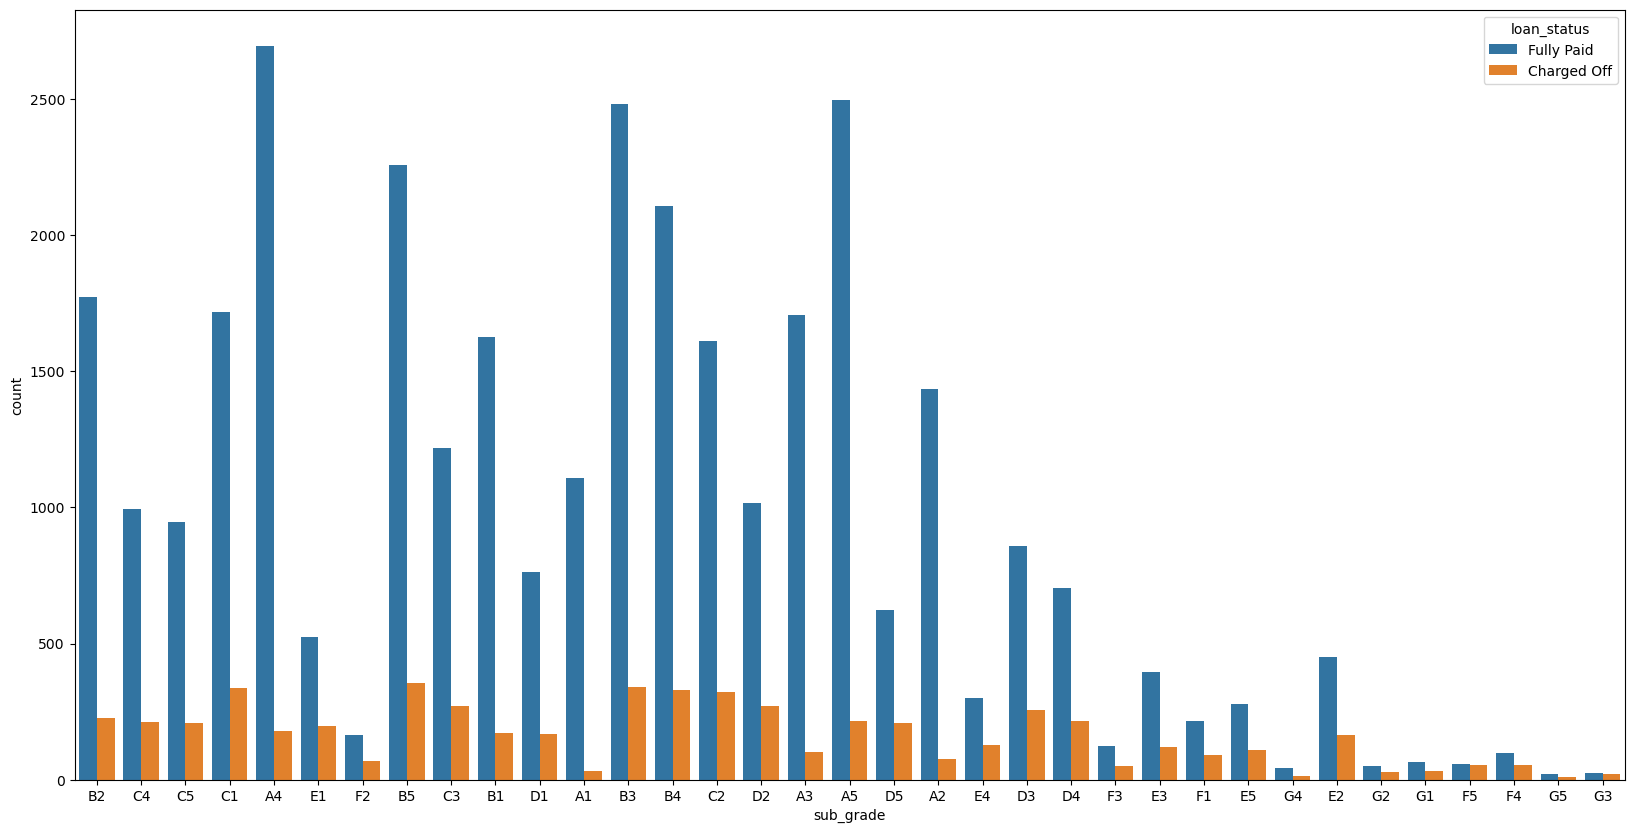

,sub_grade,Defaulter%,tot_count
0,F5,47.787611,113
1,G3,42.222222,45
2,G2,36.363636,77
3,F4,35.099338,151
4,G5,34.482759,29
5,G1,32.978723,94
6,F2,30.042918,233
7,F1,29.836066,305
8,E4,29.716981,424
9,F3,29.310345,174


In [285]:
uni_cat_analysis('sub_grade')

Observation: Similar to Grade, subgrade is linked with higher defaulters. Defaulter % continuously increases from 1 to 5 within grade. Higher number and higher alphabet being the risky ones. Lower grade + sub grade loan is less risk

### Emp Length

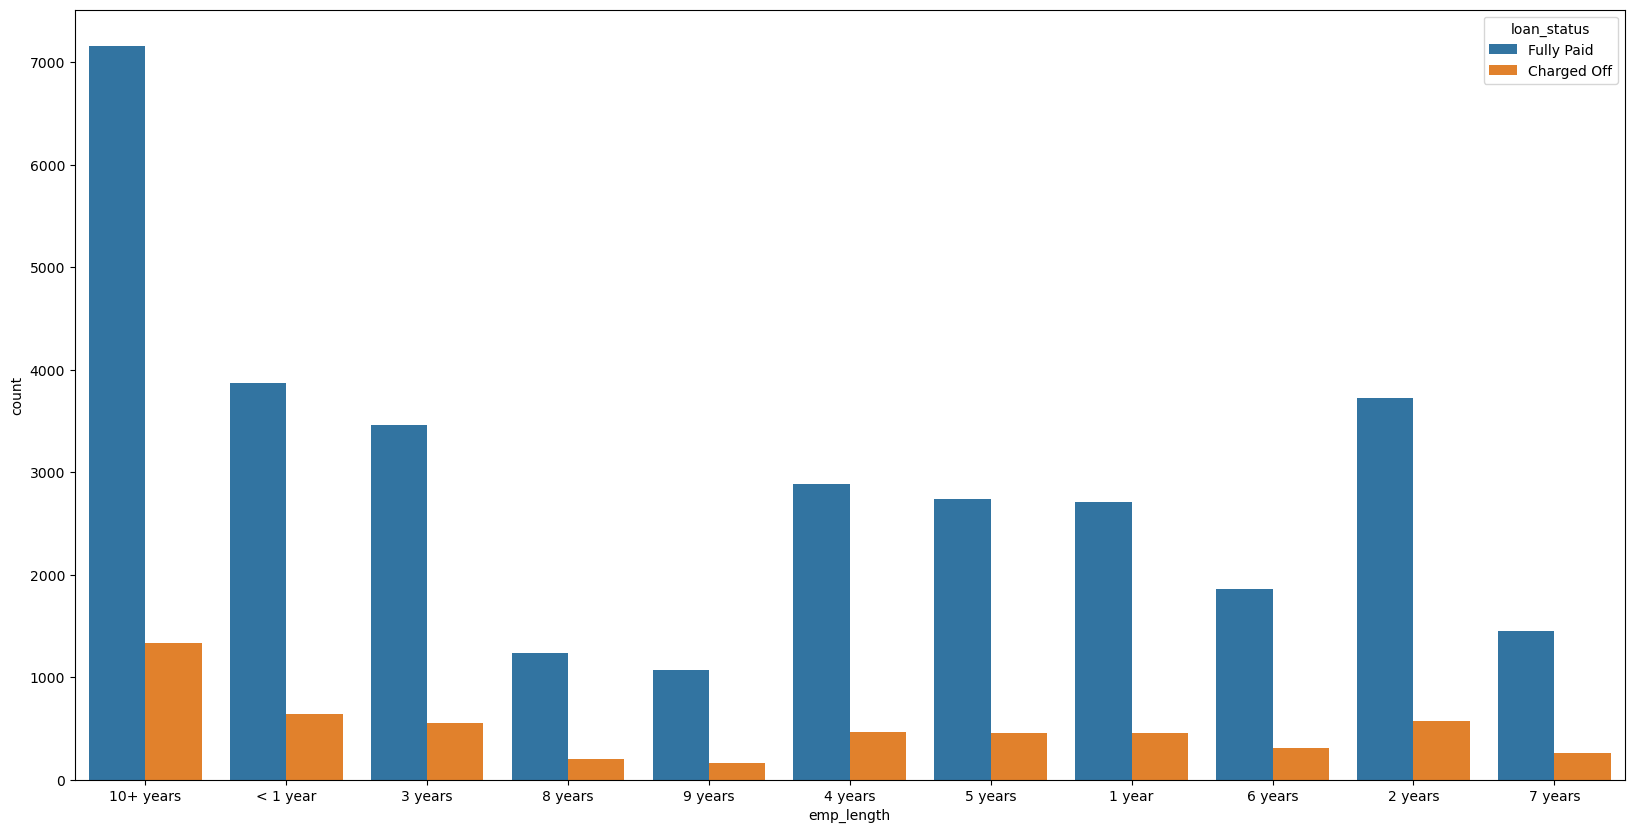

,emp_length,Defaulter%,tot_count
0,10+ years,15.680961,8488
1,7 years,15.371128,1711
2,1 year,14.389397,3169
3,5 years,14.339386,3194
4,< 1 year,14.174800,4508
5,6 years,14.160517,2168
6,8 years,14.146341,1435
7,3 years,13.833500,4012
8,4 years,13.824057,3342
9,2 years,13.213703,4291


In [286]:
uni_cat_analysis('emp_length')

Observation - No definate pattern between loan status and emp lenght. While 10+ years has slightly higher defaulter %, does not vary too much with 7 years or even 1 year employment years. Inconsequential so far.

### Home Ownership

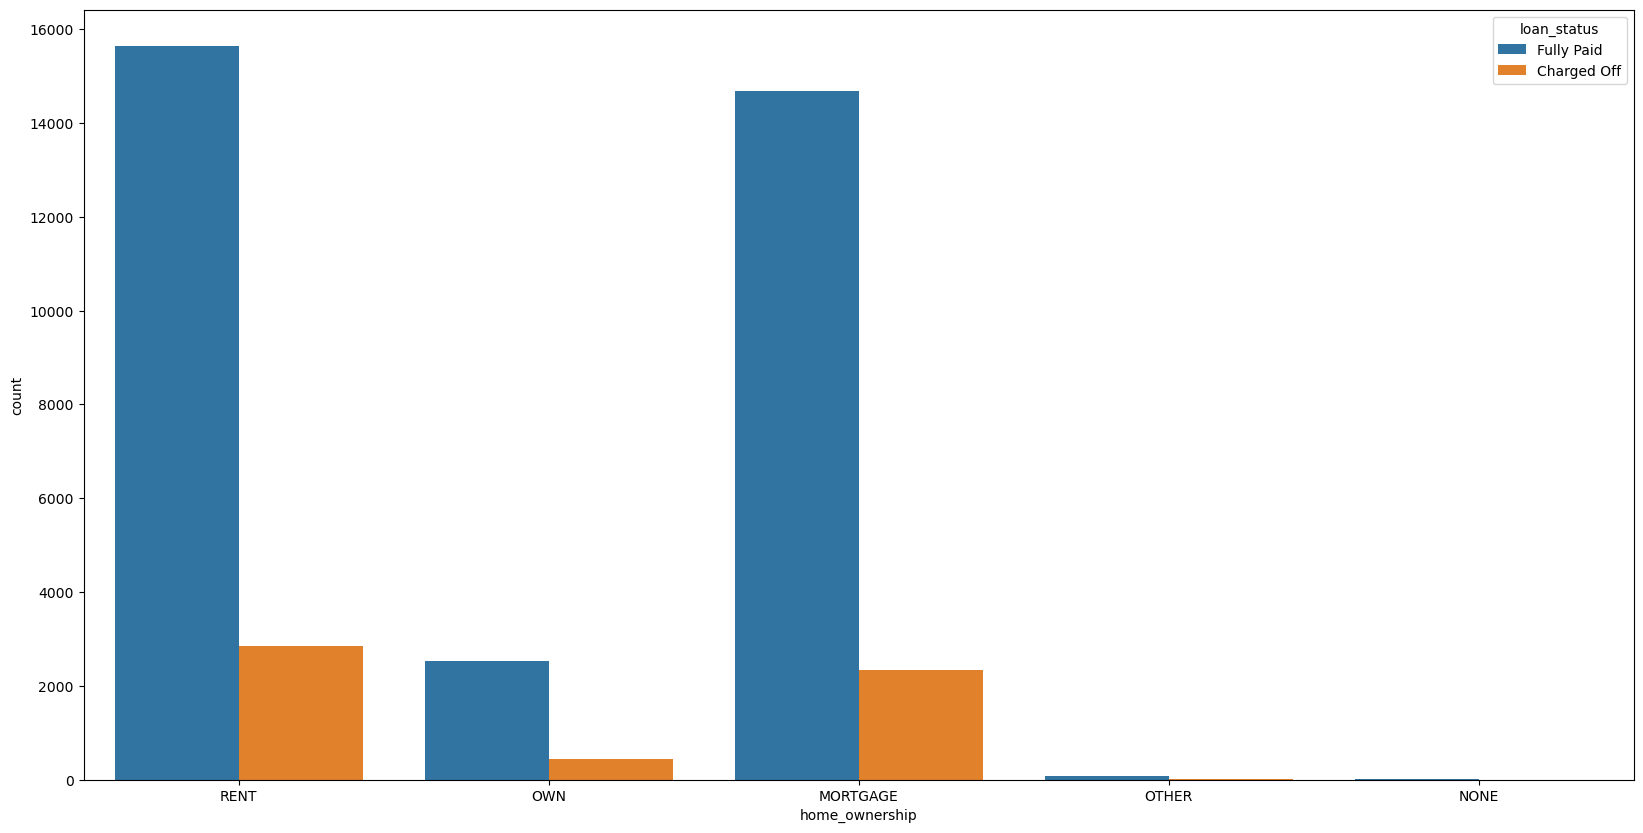

,home_ownership,Defaulter%,tot_count
0,OTHER,18.367347,98
1,RENT,15.362554,18480
2,OWN,14.890756,2975
3,MORTGAGE,13.671347,17021


In [288]:
uni_cat_analysis('home_ownership')

Observation - Nothing conclusive can be said since the higher defaulter % is higher for 'Other' and count is very less. Own and Rent have similar defaulter %

### Verification Status

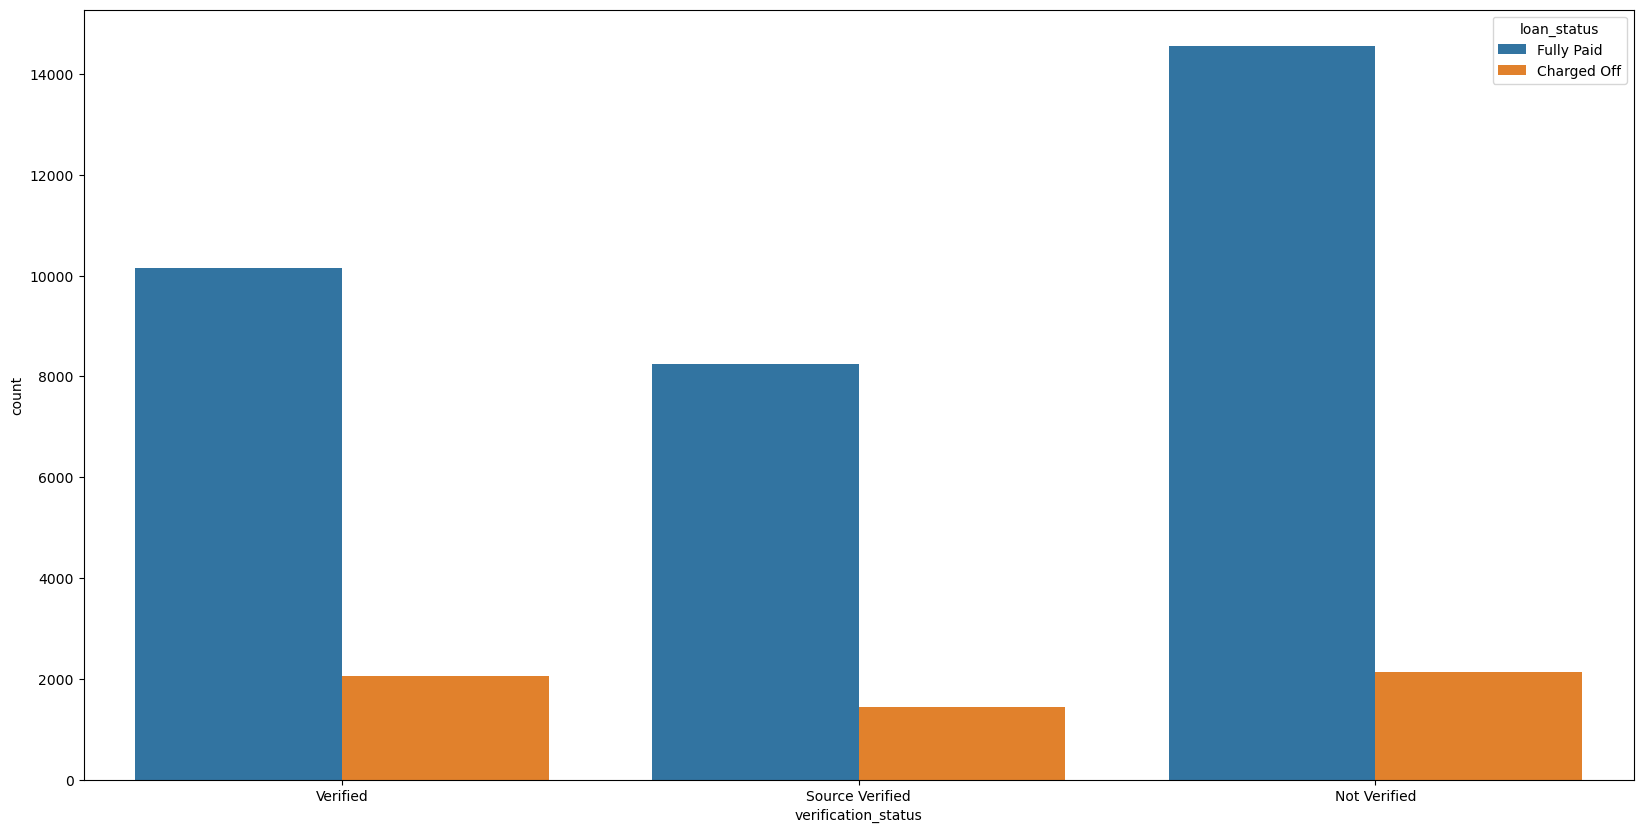

,verification_status,Defaulter%,tot_count
0,Verified,16.803212,12206
1,Source Verified,14.818642,9677
2,Not Verified,12.830957,16694


In [289]:
uni_cat_analysis('verification_status')

Observation: Surprisingly a 'Verfied' status has more defaulters than non-verified. Requested verification documents either not vetted or can be forged easily.

### Purpose

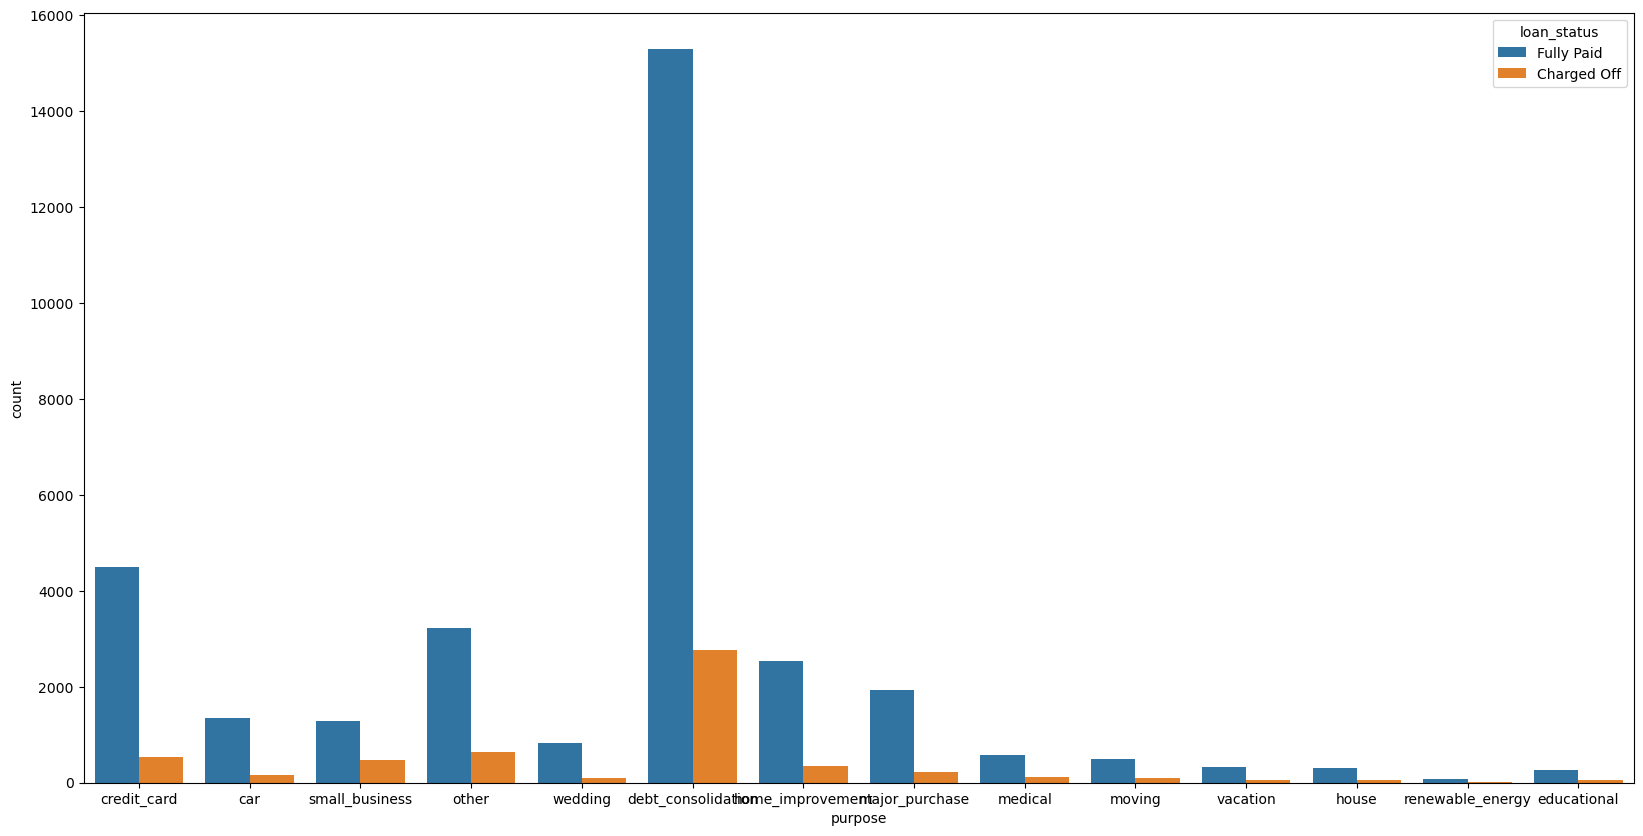

,purpose,Defaulter%,tot_count
0,small_business,27.080958,1754
1,renewable_energy,18.627451,102
2,educational,17.230769,325
3,other,16.377749,3865
4,house,16.076294,367
5,moving,15.972222,576
6,medical,15.565345,681
7,debt_consolidation,15.325395,18055
8,vacation,14.133333,375
9,home_improvement,12.069565,2875


In [290]:
uni_cat_analysis('purpose')

Observation: There is some indication of certain purposes having higher defaulters. Like loans taken for 'small business' are risky. Debt consolidation loans are the most.

### Address State

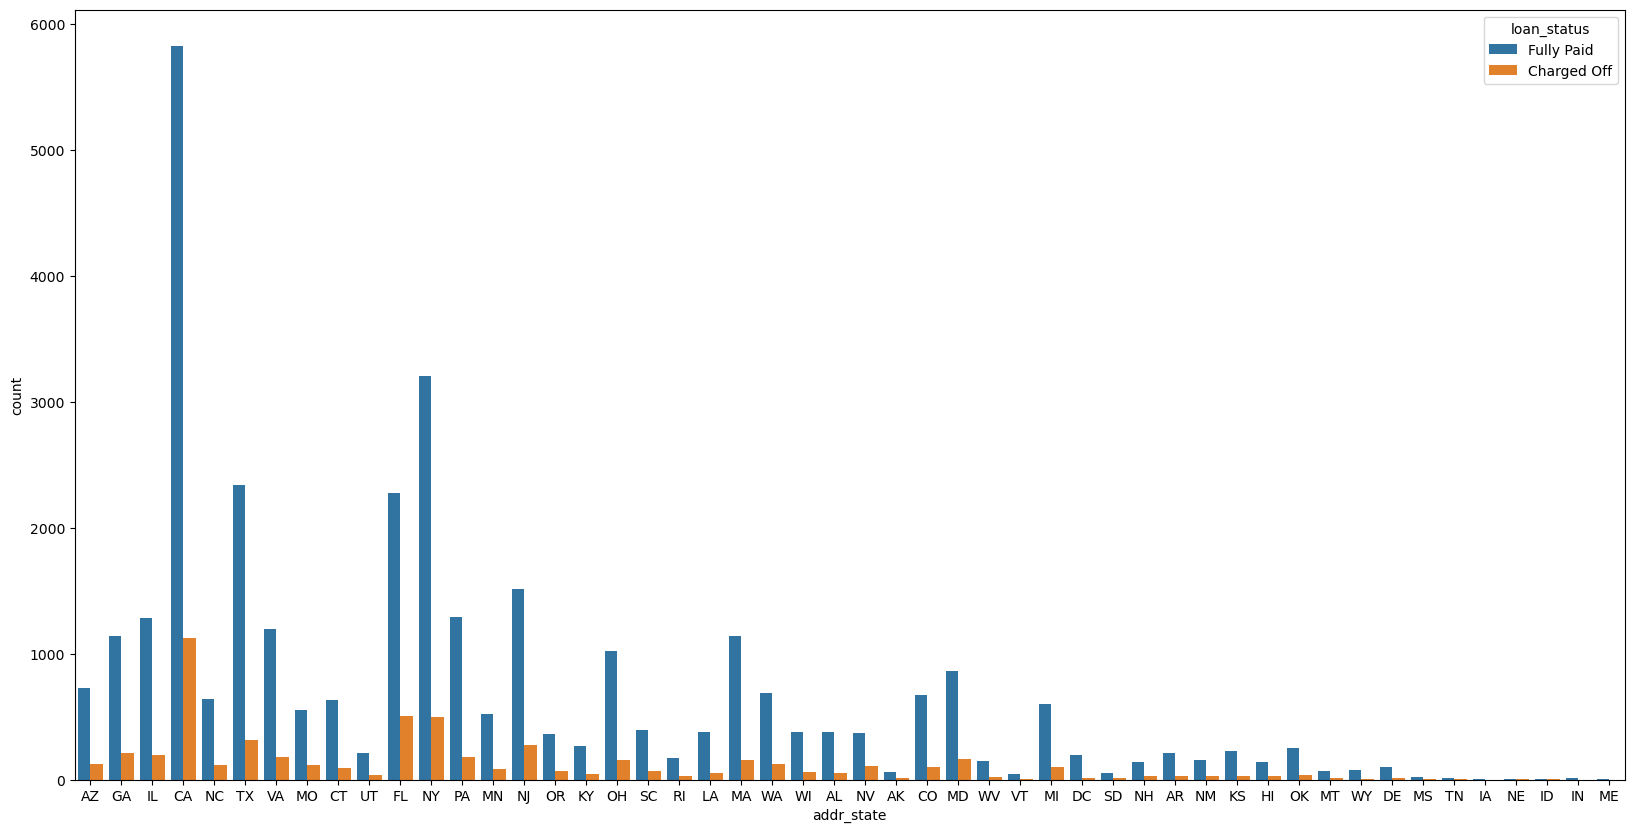

,addr_state,Defaulter%,tot_count
0,NE,60.000000,5
1,NV,22.546973,479
2,SD,19.354839,62
3,AK,19.230769,78
4,FL,18.122977,2781
5,MO,17.014925,670
6,HI,16.867470,166
7,ID,16.666667,6
8,NM,16.393443,183
9,OR,16.321839,435


In [291]:
uni_cat_analysis('addr_state')

Observation: Some indication of Defaulters. NE, even though loans very few is a high risk state. Similarly NV, SD and AK to some extent are high risk.

### Derogatory Public Records

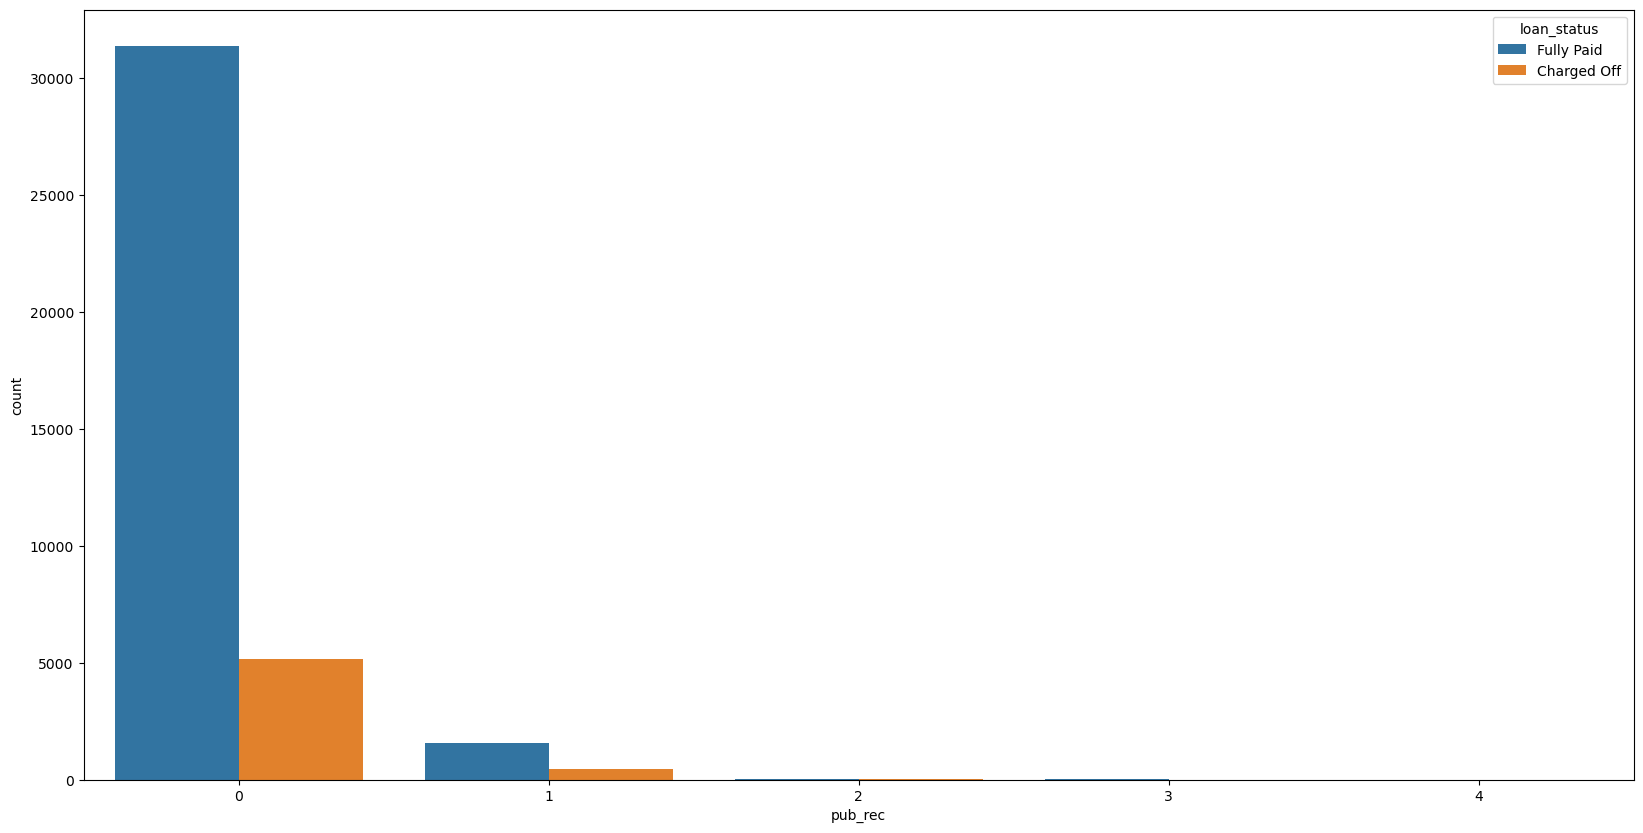

,pub_rec,Defaulter%,tot_count
0,1,22.702434,2013
1,2,20.833333,48
2,0,14.134276,36507


In [292]:
uni_cat_analysis('pub_rec')

Observation: Any amount of public derogatory records has higher chance of defaulters.

### Public record Bankruptcies

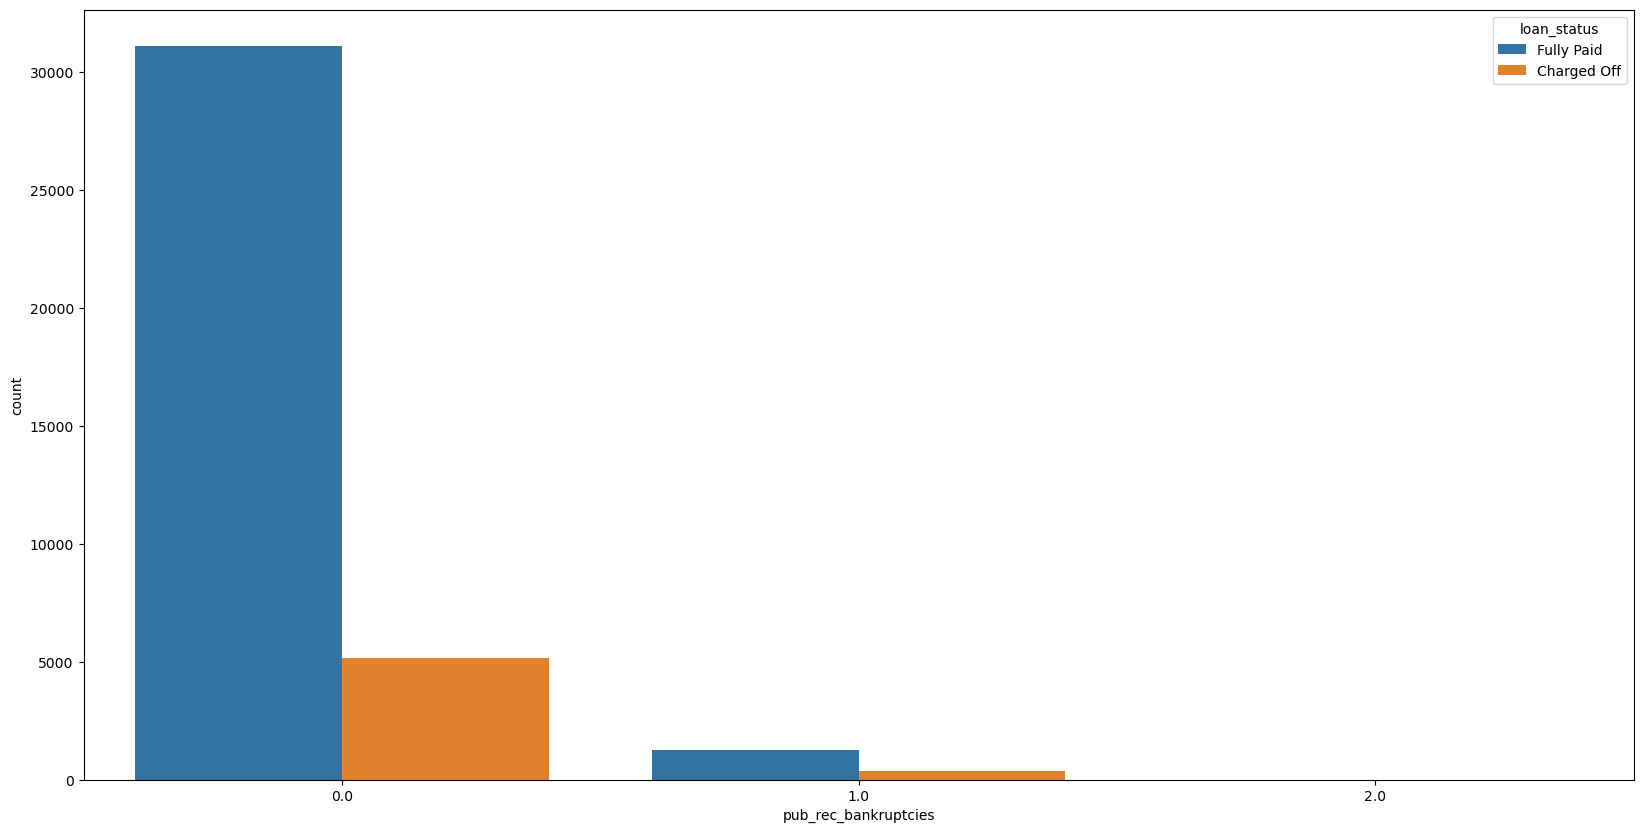

,pub_rec_bankruptcies,Defaulter%,tot_count
0,2.0,40.000000,5
1,1.0,22.357972,1637
2,0.0,14.186765,36238


In [293]:
uni_cat_analysis('pub_rec_bankruptcies')

Observation: As expoected, Higher the banckruptcies recorded higher the chance of defaulters.

### Issue Year

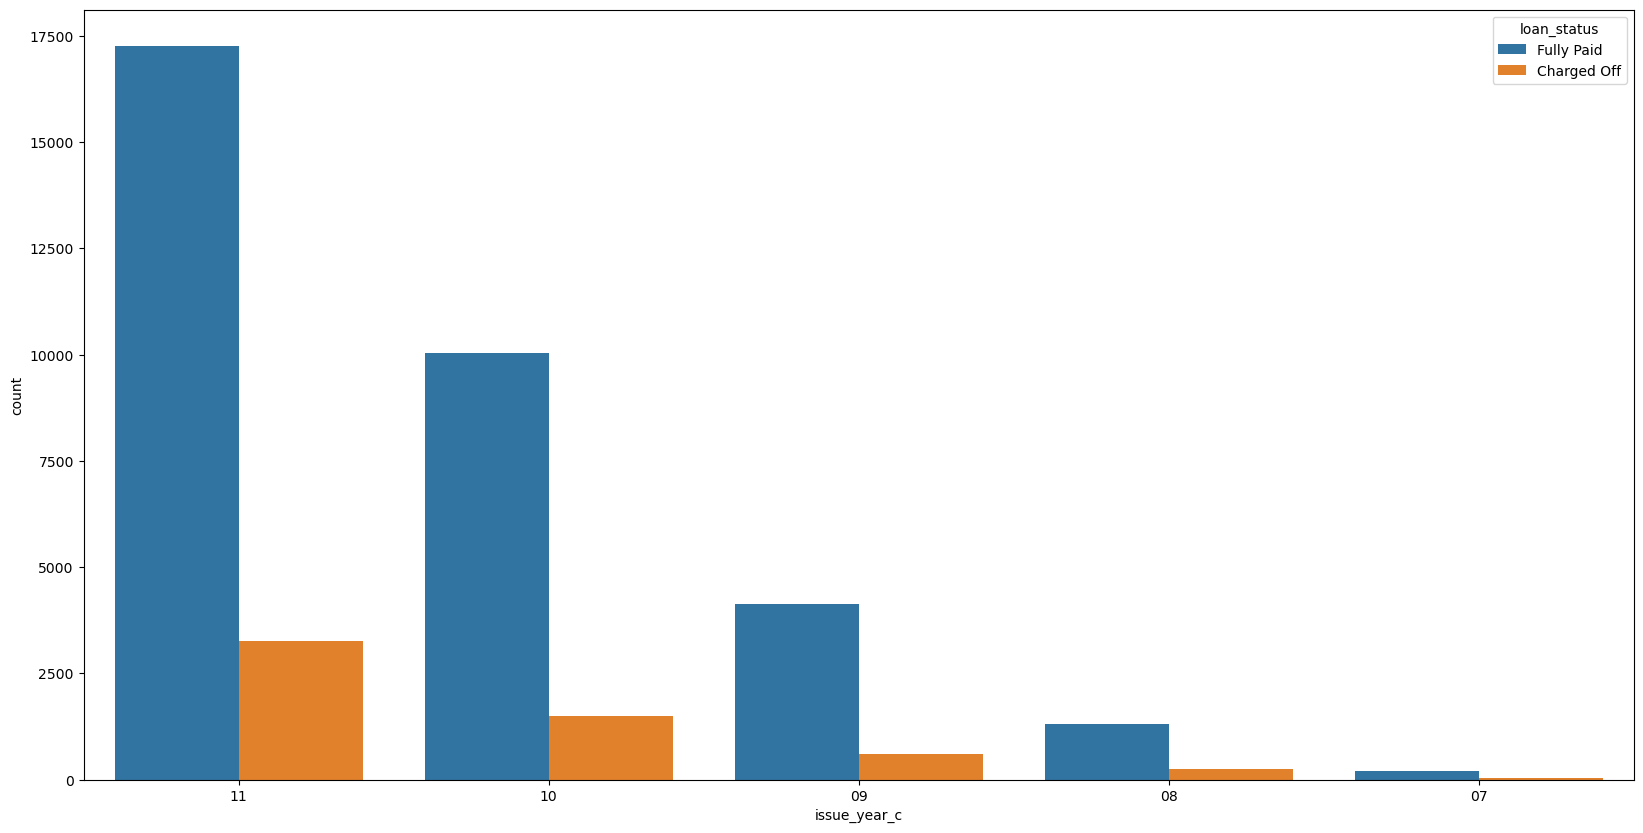

,issue_year_c,Defaulter%,tot_count
0,07,17.928287,251
1,11,15.870540,20516
2,08,15.813060,1562
3,10,12.877211,11532
4,09,12.595420,4716


In [294]:
uni_cat_analysis('issue_year_c')

Observation: Looks like the defaulter % has gone down from 2007 - 2009 with no of loans issued increasing, and has increased from 2010-2011 with a constant increase in loans from 2007-2011  

### Issue Month

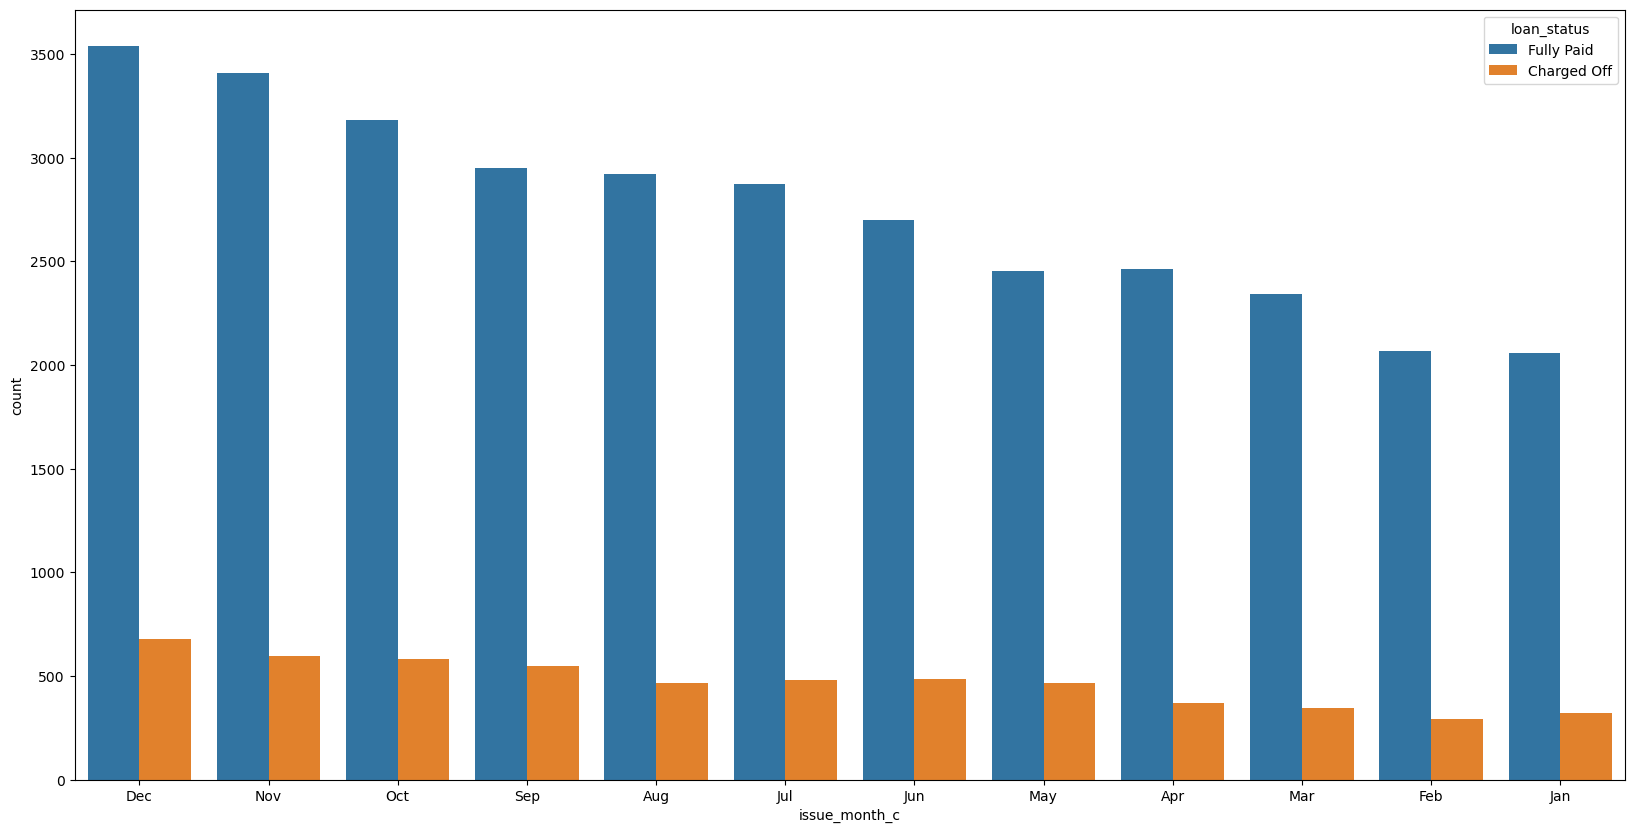

,issue_month_c,Defaulter%,tot_count
0,Dec,16.085409,4215
1,May,15.964371,2919
2,Sep,15.637507,3498
3,Oct,15.421430,3761
4,Jun,15.188679,3180
5,Nov,14.927609,4006
6,Jul,14.294241,3351
7,Aug,13.813459,3388
8,Jan,13.493064,2379
9,Apr,13.069587,2831


In [295]:
uni_cat_analysis('issue_month_c')

Observation: Number of loans and defaulters highest in Decemeber followed by May. Need to understand this against other variables for better analysis.

### Earliest Credit Line Month

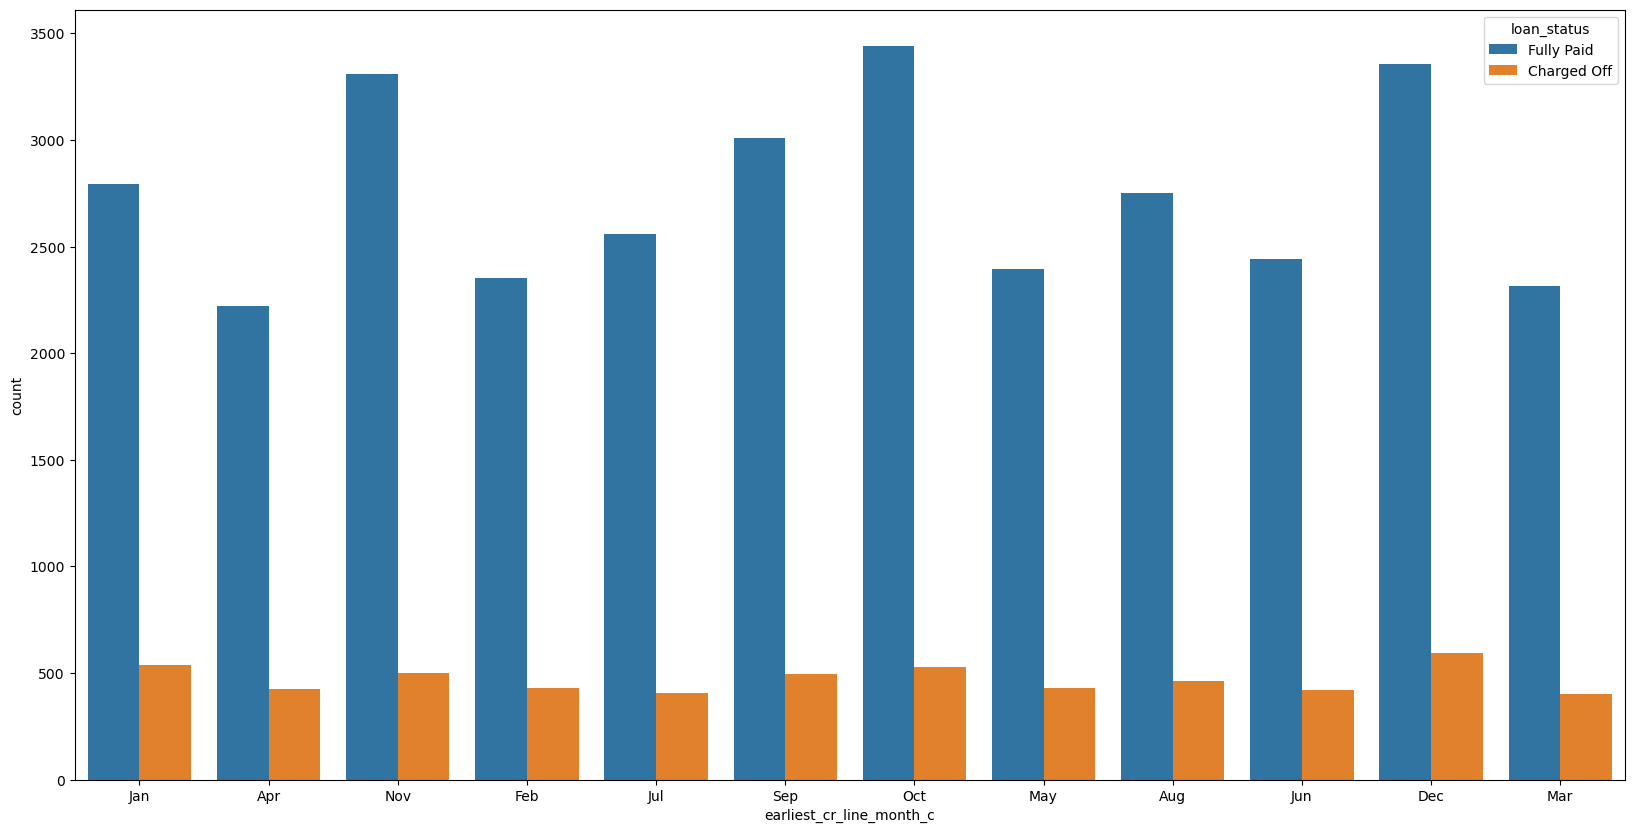

,earliest_cr_line_month_c,Defaulter%,tot_count
0,Jan,16.091264,3331
1,Apr,15.986395,2646
2,Feb,15.450952,2783
3,May,15.150442,2825
4,Dec,15.084789,3951
5,Mar,14.732965,2715
6,Jun,14.704855,2863
7,Aug,14.347961,3213
8,Sep,14.179743,3505
9,Jul,13.751264,2967


In [296]:
uni_cat_analysis('earliest_cr_line_month_c')

Observation: Nothing conclusive can be said

### Earliest Credit Line Year

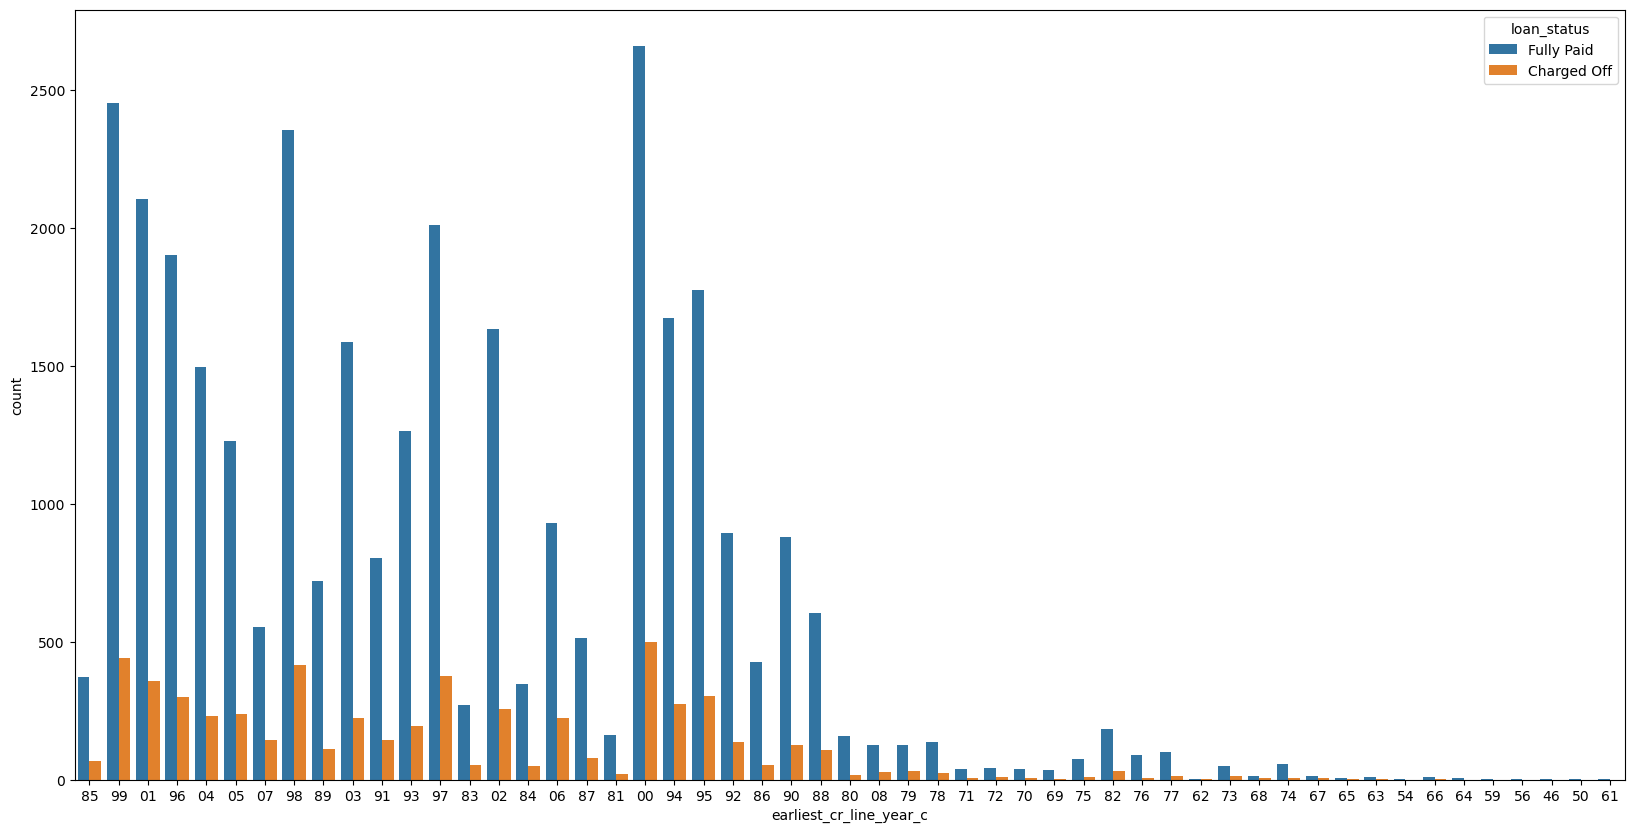

,earliest_cr_line_year_c,Defaulter%,tot_count
0,62,40.000000,5
1,67,27.777778,18
2,68,26.315789,19
3,07,20.630372,698
4,79,19.745223,157
5,73,19.672131,61
6,06,19.410745,1154
7,08,18.300654,153
8,66,18.181818,11
9,83,16.459627,322


In [297]:
uni_cat_analysis('earliest_cr_line_year_c')

Observation: 62,67 and 68 definitely has a very high defaulter % but very low loan count. Nothing further.

### Emloyee Title

In [428]:
uni_cat_analysis_no_plot('emp_title')

,emp_title,Defaulter%,tot_count
0,(self) Castleforte Group,100.000000,1
1,Ridewell Suspensions,100.000000,1
2,Right Angle Contracting,100.000000,1
3,Rillago Home Health Services,100.000000,1
4,Rim of the World Unified School District,100.000000,1
...,...,...,...
4631,Lockheed Martin,4.761905,42
4632,Columbia University,4.761905,21
4633,Citigroup,4.545455,22
4634,USAF,3.846154,52


Observation : Nothing conclusive can be said. Single count unique titles have high failure maybe.

### Title

In [429]:
uni_cat_analysis_no_plot('title')

,title,Defaulter%,tot_count
0,HITEK EQUIPMENT,100.000000,1
1,Radu C,100.000000,1
2,REC,100.000000,1
3,RELIEF LOAN,100.000000,1
4,RELISTED: Milestone Farm Expansion,100.000000,1
...,...,...,...
3244,car,3.846154,26
3245,Home improvement,3.448276,58
3246,Credit Card Refinancing,3.225806,31
3247,Credit Card Refi,2.941176,34


Observation : Nothing conclusive can be said. Single count unique titles have high failure maybe.

### 30+ Days Overdue in last 2 years

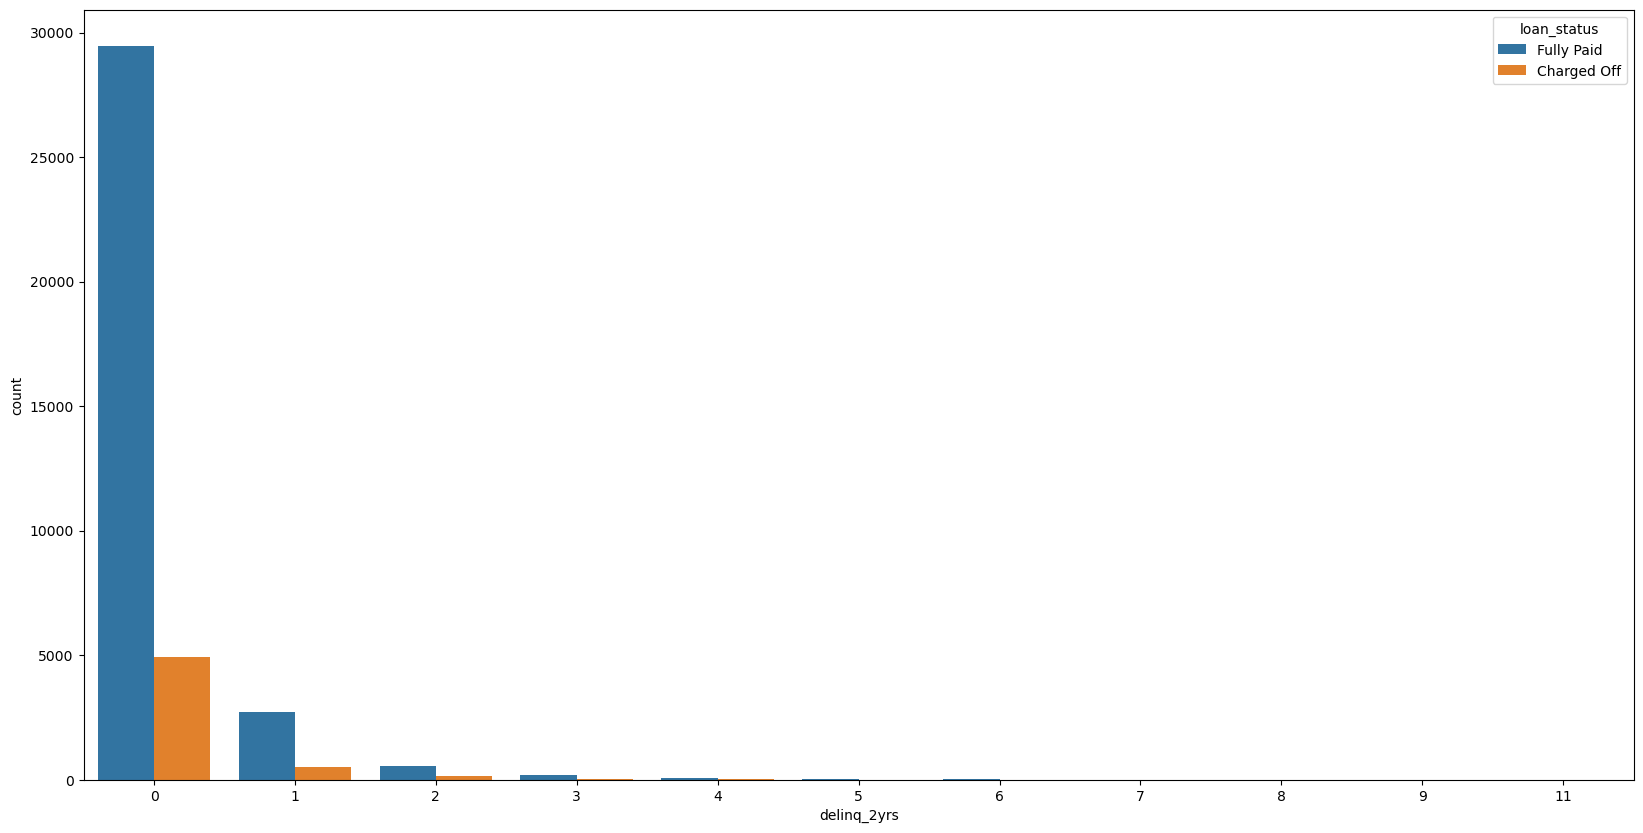

,delinq_2yrs,Defaulter%,tot_count
0,8,50.000000,2
1,7,25.000000,4
2,4,21.666667,60
3,2,19.316493,673
4,3,16.509434,212
5,1,15.809167,3207
6,0,14.354679,34386
7,5,14.285714,21
8,6,10.000000,10


In [332]:
#Even though numeric data, can be analysed as categorical for the kind of data is present.
uni_cat_analysis('delinq_2yrs')

Observation: Any sort of deliqunecy is definitely an indicator of risk. No past due has lesser defaulters in comparison to loans. There are exceptions but very few. Higher delinq_2yrs should be avoided for loan.

### Inquiry in Last 6 months

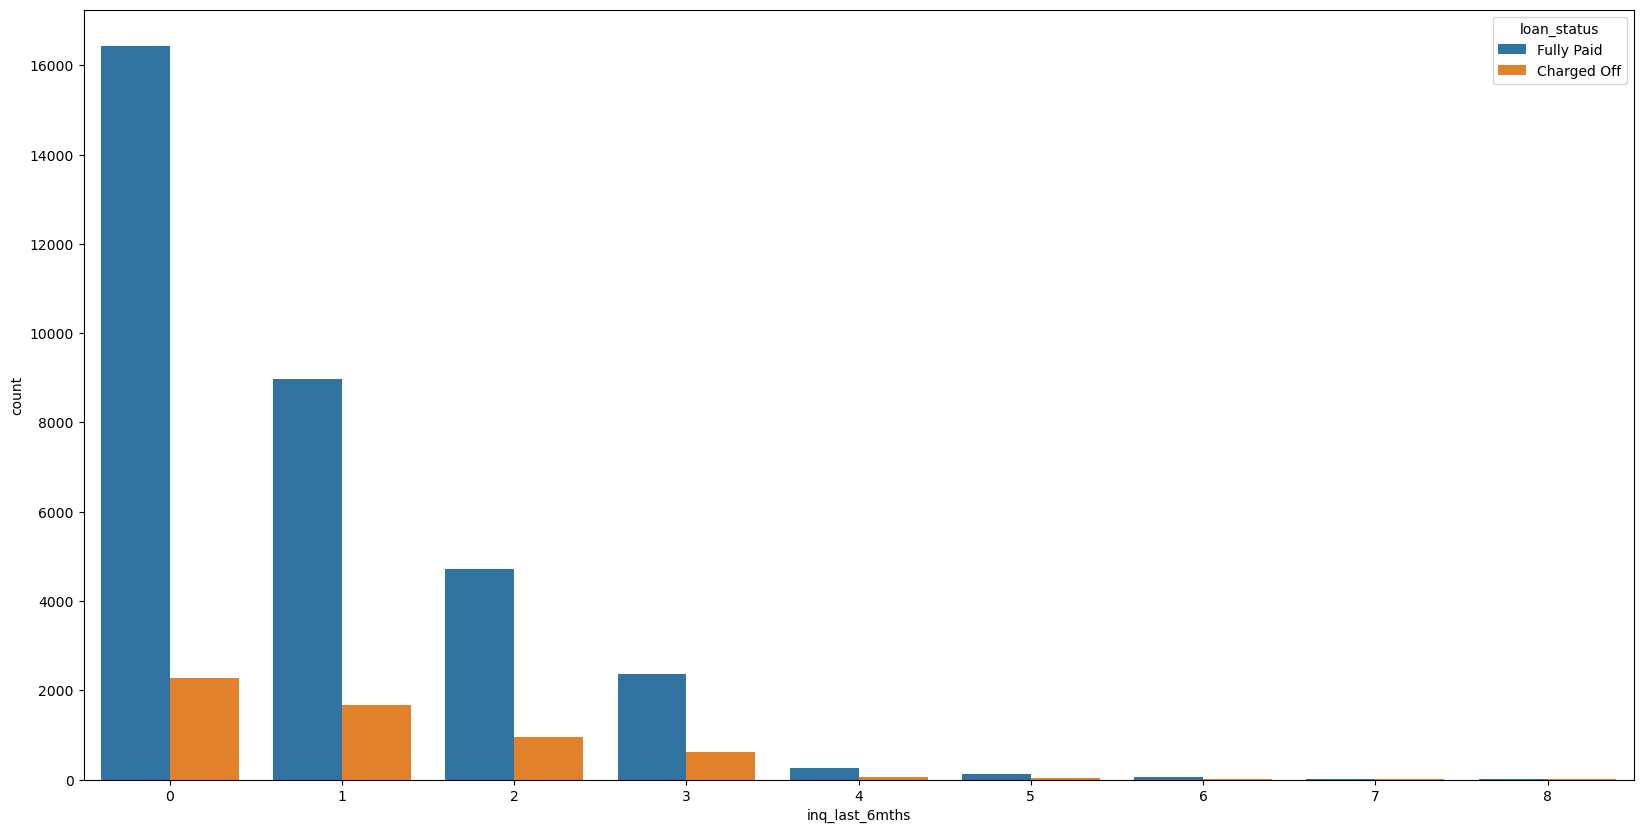

,inq_last_6mths,Defaulter%,tot_count
0,7,29.411765,34
1,6,25.396825,63
2,8,21.428571,14
3,3,20.750922,2983
4,5,19.444444,144
5,2,16.678458,5654
6,4,16.139241,316
7,1,15.731707,10660
8,0,12.186648,18709


In [337]:
#Even though numeric data, can be analysed as categorical for the kind of data is present.
uni_cat_analysis('inq_last_6mths')

Observation: Higher enquiries mean higher risk. Most people who have taken loan have taken withing 2-3 enquiries. Individuals who have enquired a lot of times have also defaulted more.

## Univariate Numerical

Have created bins for the numerical columns for a more efficient analysis. Have also analysed without outliers wherever applicable.

In [304]:
num_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate','installment'
            , 'annual_inc','dti','open_acc','revol_bal',
            'open_acc','revol_util','total_acc']

In [500]:
# Create new custom columns with bins for Numerical columns for analysis.
for x in num_cols:
    df_loan_closed[x+'_c'] = pd.qcut(df_loan_closed[x], q=5, duplicates = 'drop')
    
df_loan_closed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month_c,issue_year_c,earliest_cr_line_month_c,earliest_cr_line_year_c,loan_amnt_c,funded_amnt_c,funded_amnt_inv_c,int_rate_c,installment_c,annual_inc_c,dti_c,open_acc_c,revol_bal_c,revol_util_c,total_acc_c,delinq_2yrs_c,inq_last_6mths_c
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.0,Dec,11,Jan,85,"(499.999, 5000.0]","(499.999, 5000.0]","(4375.0, 7000.0]","(7.9, 10.99]","(149.922, 228.71]","(3999.999, 37196.16]","(19.71, 29.99]","(1.999, 6.0]","(11391.6, 19617.0]","(77.3, 99.9]","(1.999, 12.0]","(-0.001, 11.0]","(-0.001, 1.0]"
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.0,Dec,11,Apr,99,"(499.999, 5000.0]","(499.999, 5000.0]","(-0.001, 4375.0]","(15.21, 24.4]","(15.689, 149.922]","(3999.999, 37196.16]","(-0.001, 6.91]","(1.999, 6.0]","(-0.001, 2787.0]","(-0.001, 19.9]","(1.999, 12.0]","(-0.001, 11.0]","(2.0, 8.0]"
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.0,Dec,11,Nov,01,"(499.999, 5000.0]","(499.999, 5000.0]","(-0.001, 4375.0]","(15.21, 24.4]","(15.689, 149.922]","(3999.999, 37196.16]","(6.91, 11.35]","(1.999, 6.0]","(2787.0, 6528.0]","(77.3, 99.9]","(1.999, 12.0]","(-0.001, 11.0]","(1.0, 2.0]"
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.0,Dec,11,Feb,96,"(7750.0, 11200.0]","(7500.0, 10875.0]","(7000.0, 10000.0]","(12.84, 15.21]","(327.96, 480.33]","(37196.16, 50004.0]","(19.71, 29.99]","(8.0, 10.0]","(2787.0, 6528.0]","(19.9, 39.9]","(31.0, 90.0]","(-0.001, 11.0]","(-0.001, 1.0]"
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,0.0,Dec,11,Nov,04,"(499.999, 5000.0]","(499.999, 5000.0]","(4375.0, 7000.0]","(5.419, 7.9]","(149.922, 228.71]","(3999.999, 37196.16]","(6.91, 11.35]","(8.0, 10.0]","(6528.0, 11391.6]","(19.9, 39.9]","(1.999, 12.0]","(-0.001, 11.0]","(2.0, 8.0]"


In [501]:
df_loan_closed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 38577 non-null  int64   
 1   funded_amnt               38577 non-null  int64   
 2   funded_amnt_inv           38577 non-null  float64 
 3   term                      38577 non-null  object  
 4   int_rate                  38577 non-null  float64 
 5   installment               38577 non-null  float64 
 6   grade                     38577 non-null  object  
 7   sub_grade                 38577 non-null  object  
 8   emp_title                 36191 non-null  object  
 9   emp_length                37544 non-null  object  
 10  home_ownership            38577 non-null  object  
 11  annual_inc                38577 non-null  float64 
 12  verification_status       38577 non-null  object  
 13  issue_d                   38577 non-null  obje

## Loan Amount

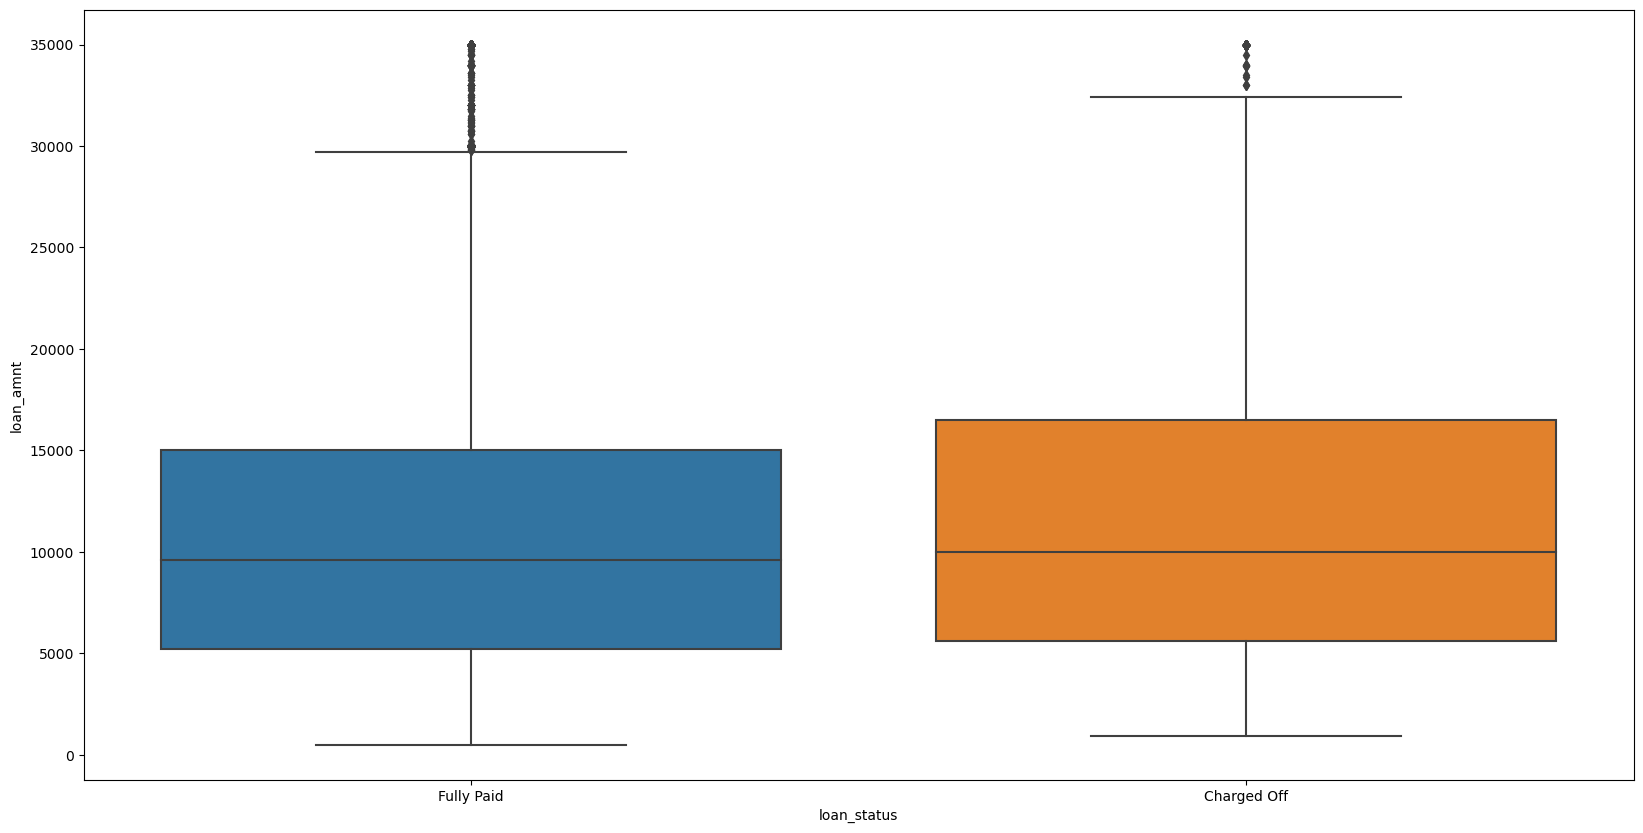

In [350]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y = 'loan_amnt',x ='loan_status', data = df_loan_closed)
plt.show()

In [351]:
df_loan_closed.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [361]:
#removing outliers <25k
df_loan_closed_ol = df_loan_closed.loc[(df_loan_closed.loan_amnt < 25000)]

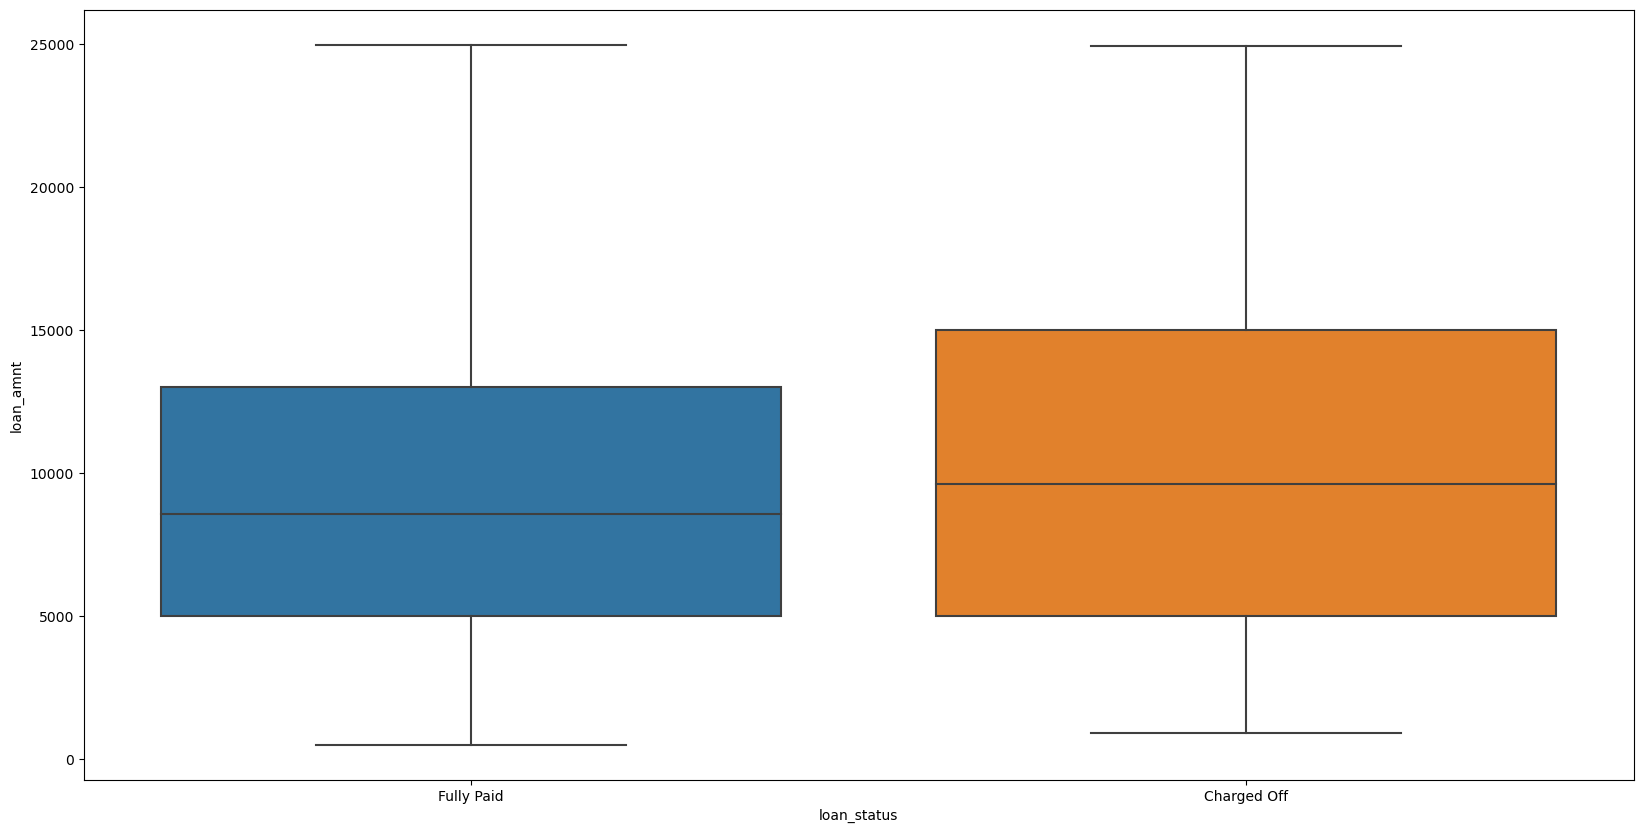

In [362]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y = 'loan_amnt',x ='loan_status', data = df_loan_closed_ol)
plt.show()

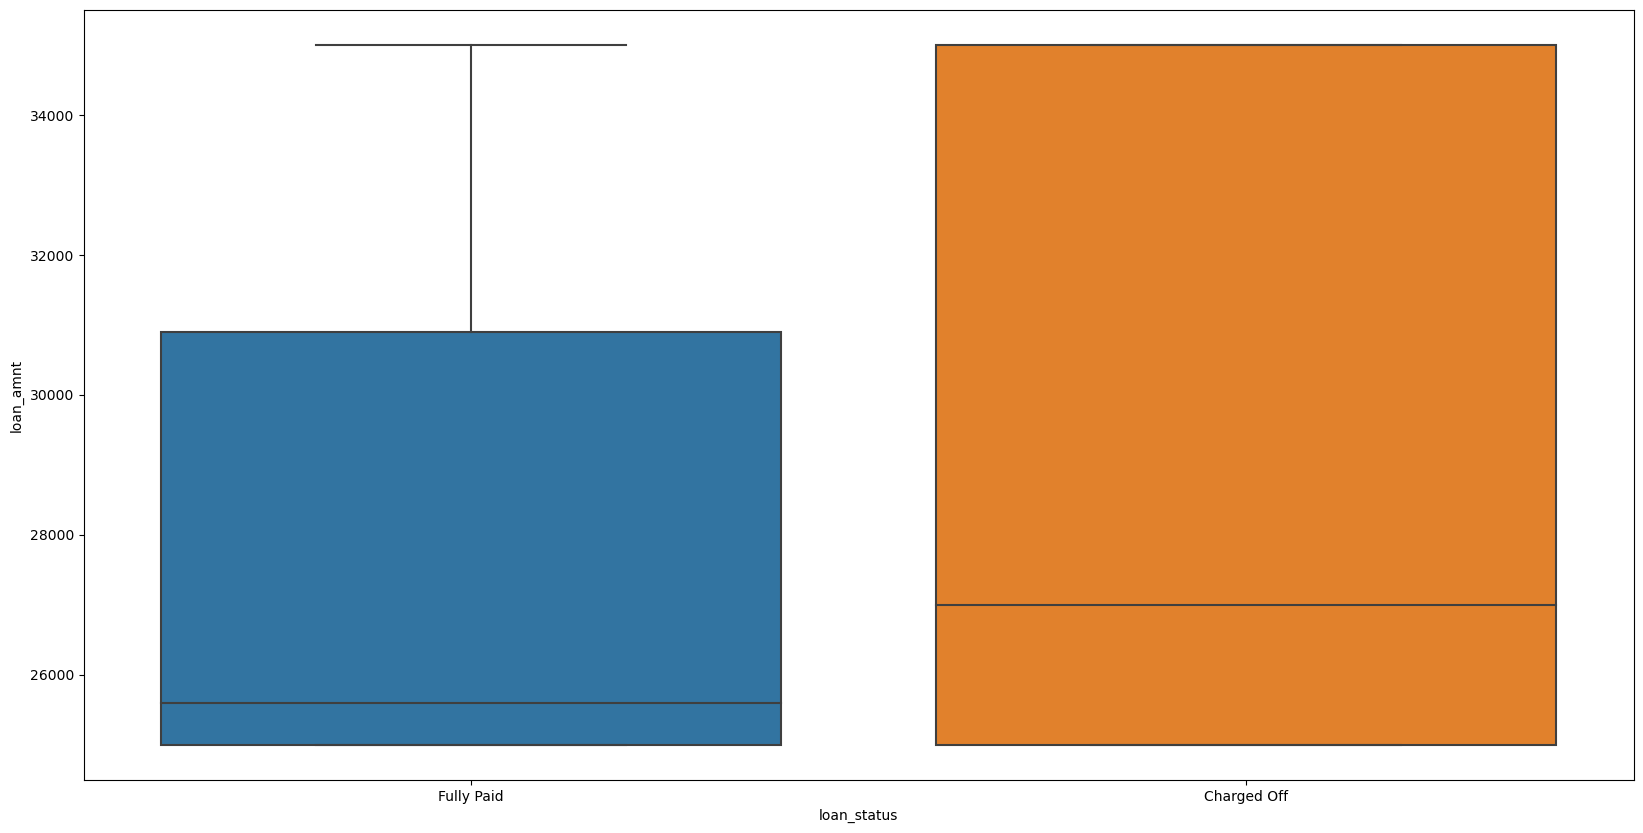

In [360]:
#only outliers >25k
df_loan_closed_ol_c = df_loan_closed.loc[(df_loan_closed.loan_amnt >= 25000)]
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y = 'loan_amnt',x ='loan_status', data = df_loan_closed_ol_c)
plt.show()

Observation : Higher Loan Amounts have higher defaulter%.

### Loan Amount - With Bins against Loan Status

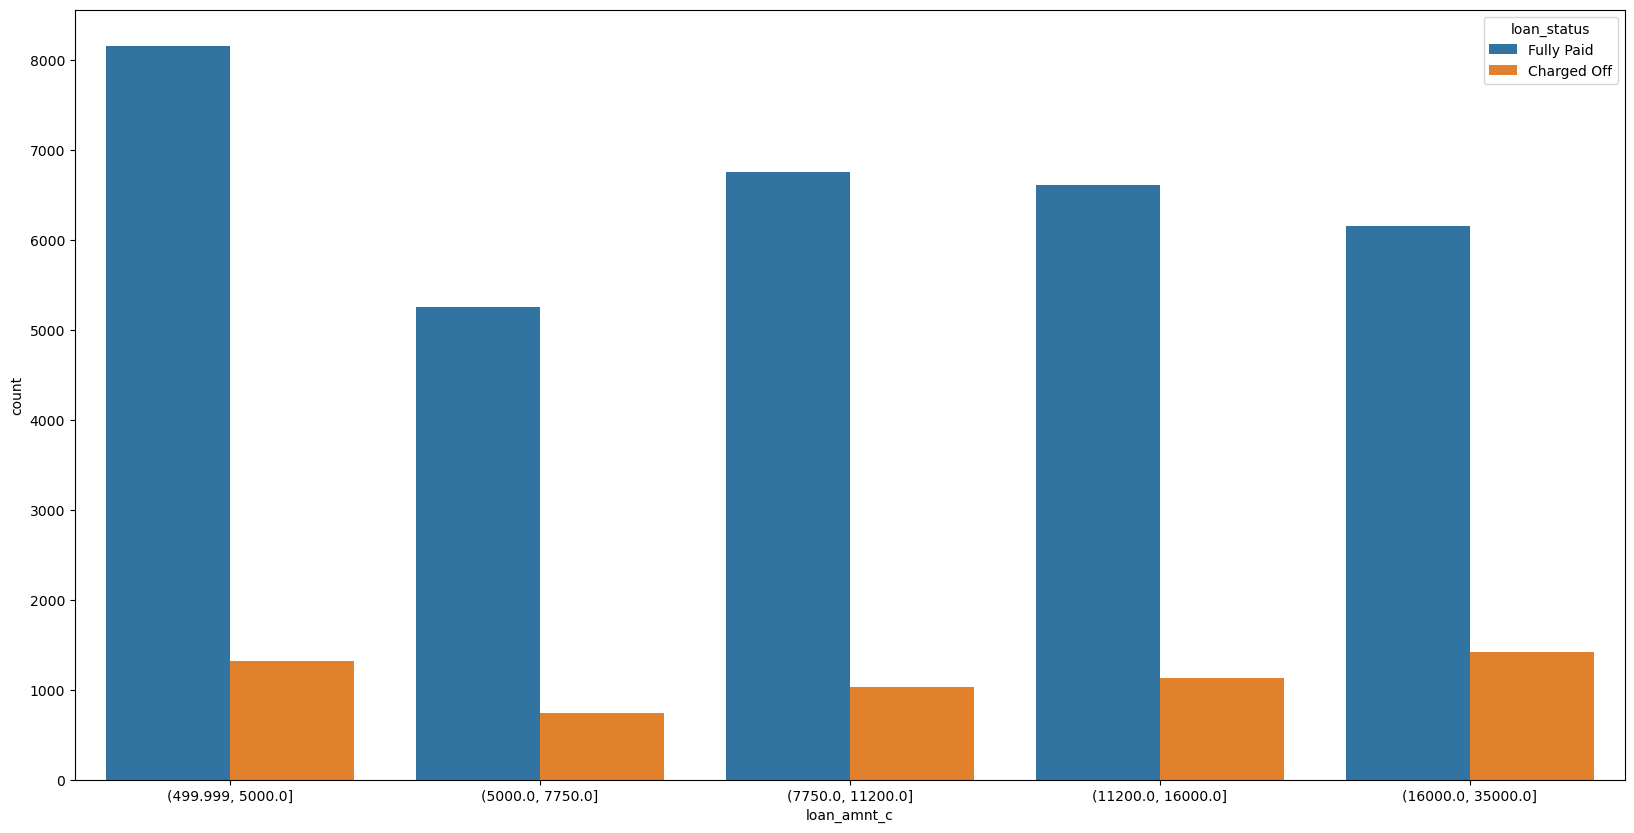

,loan_amnt_c,Defaulter%,tot_count
0,"(16000.0, 35000.0]",18.762370,7579
1,"(11200.0, 16000.0]",14.536762,7739
2,"(499.999, 5000.0]",13.872466,9472
3,"(7750.0, 11200.0]",13.161274,7788
4,"(5000.0, 7750.0]",12.352059,5999


In [363]:
uni_cat_analysis('loan_amnt_c')

Observation : Similar as above. Higher Loan Amounts have higher defaulter%.

### Interest Rate

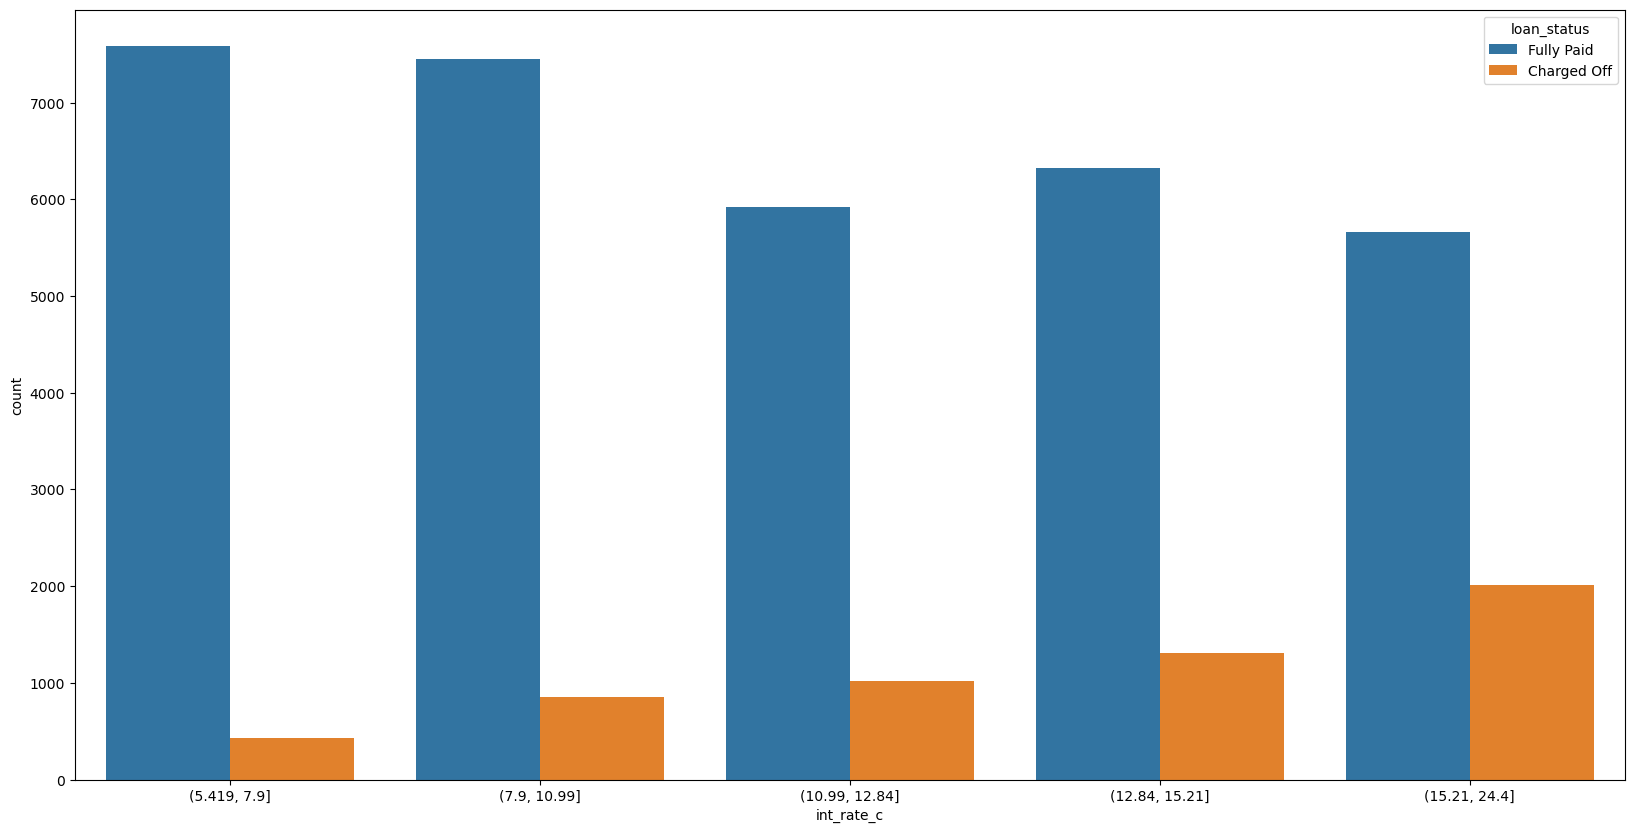

,int_rate_c,Defaulter%,tot_count
0,"(15.21, 24.4]",26.214984,7675
1,"(12.84, 15.21]",17.161932,7639
2,"(10.99, 12.84]",14.699524,6939
3,"(7.9, 10.99]",10.287571,8311
4,"(5.419, 7.9]",5.353800,8013


In [434]:
uni_cat_analysis('int_rate_c')

Observation : Higher Interest Rate have higher defaulter%.

### Annual Income

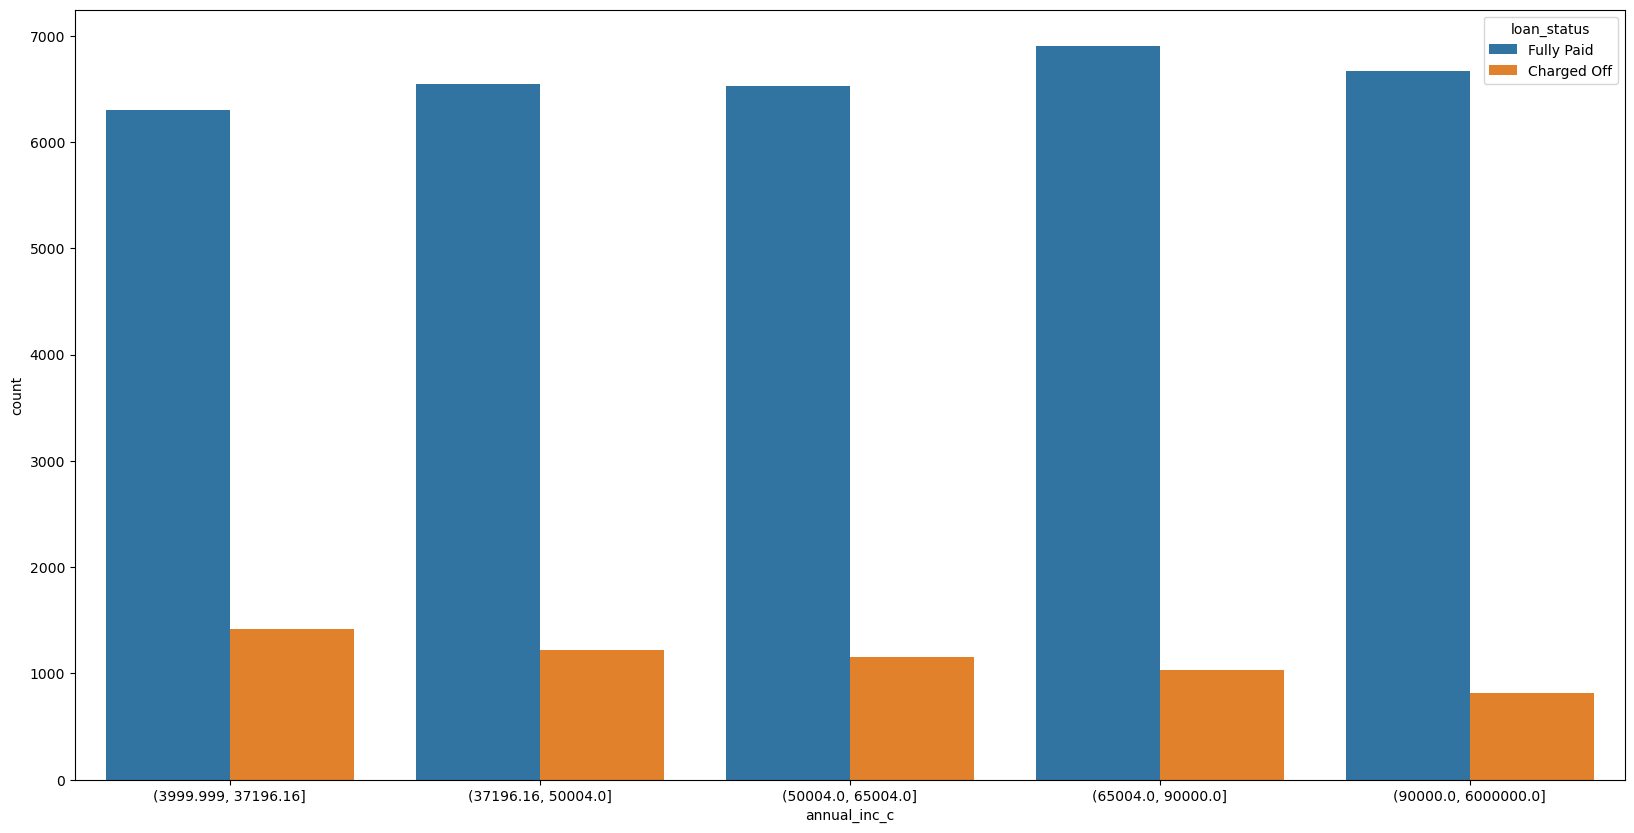

,annual_inc_c,Defaulter%,tot_count
0,"(3999.999, 37196.16]",18.312597,7716
1,"(37196.16, 50004.0]",15.692585,7768
2,"(50004.0, 65004.0]",14.962886,7679
3,"(65004.0, 90000.0]",12.965065,7929
4,"(90000.0, 6000000.0]",10.928524,7485


In [619]:
uni_cat_analysis('annual_inc_c')


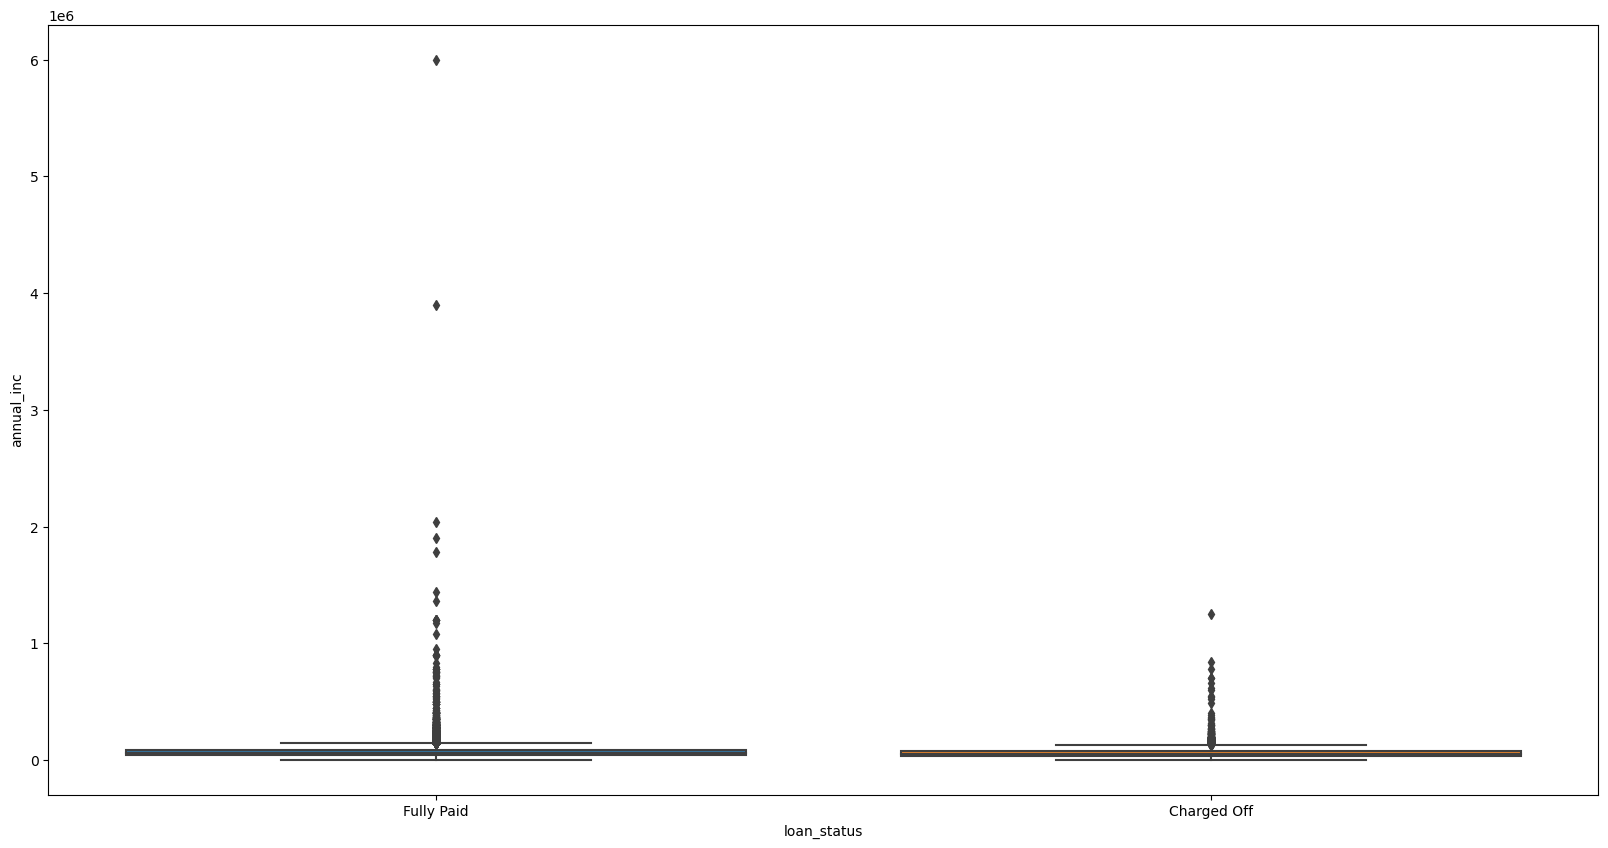

In [622]:
df_loan_closed.annual_inc.describe()
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y = 'annual_inc',x ='loan_status', data = df_loan_closed)
plt.show()

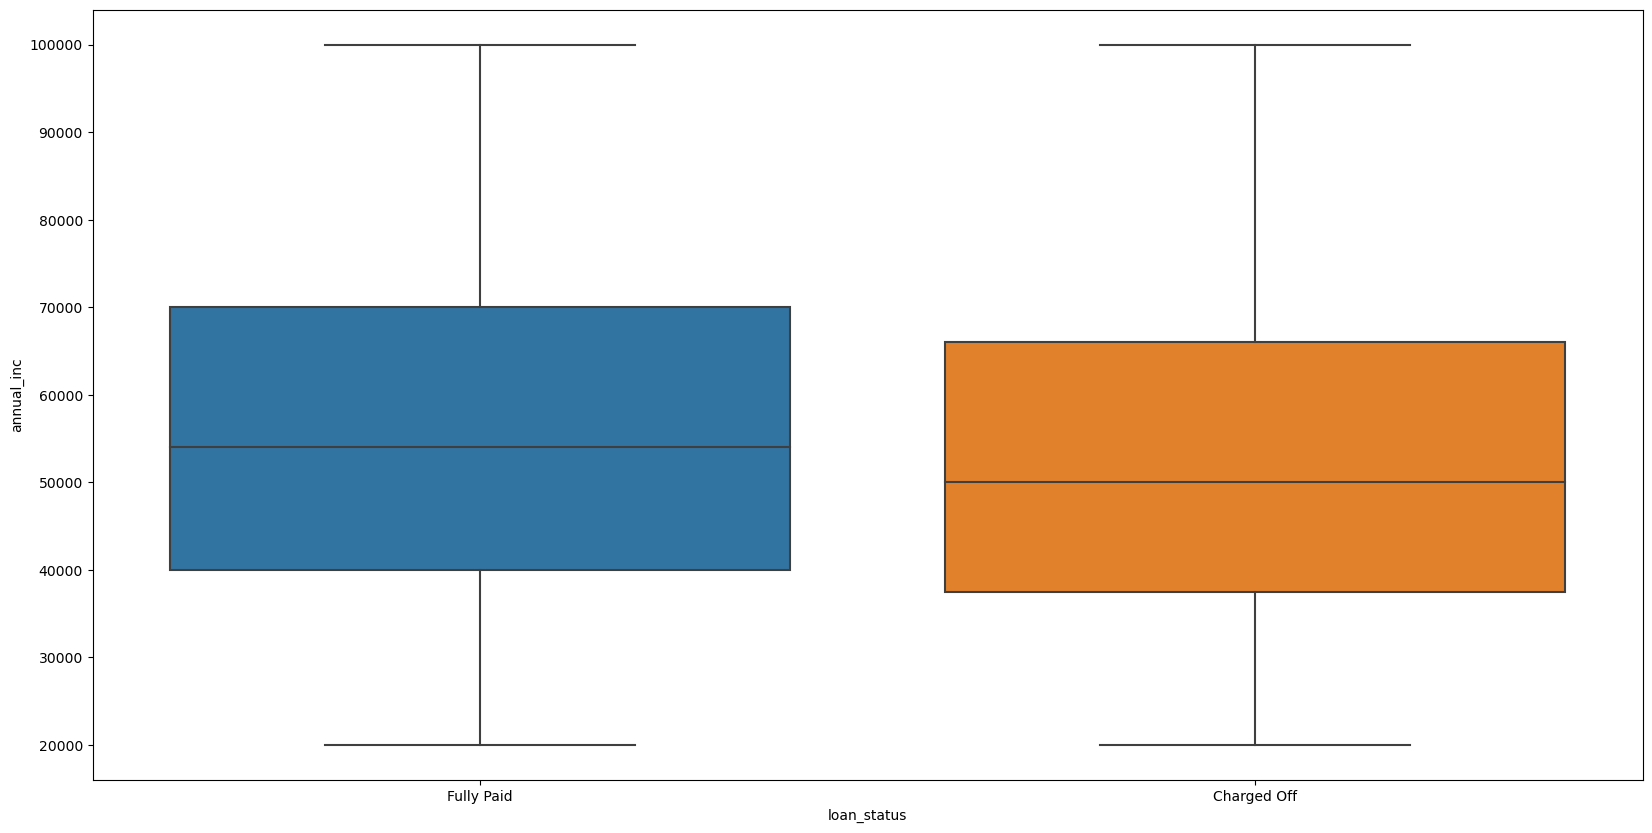

In [638]:
#remove outliers <1 Lac
df_loan_closed_inc_ol_c = df_loan_closed.loc[(df_loan_closed.annual_inc < 100000) & (df_loan_closed.annual_inc > 20000)]
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y = 'annual_inc',x ='loan_status', data = df_loan_closed_inc_ol_c)
plt.show()

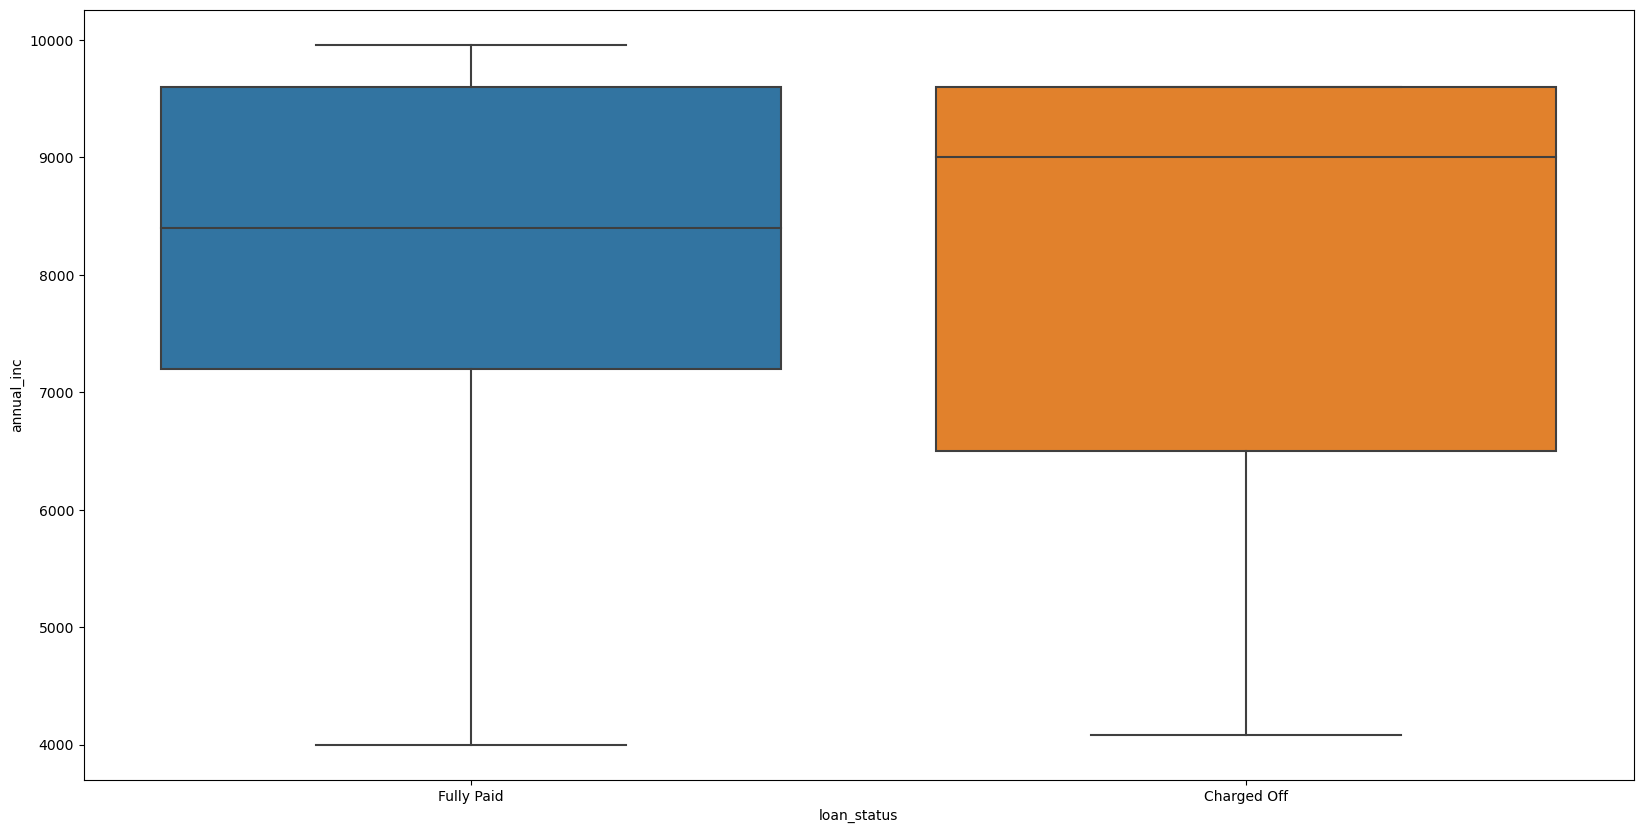

In [636]:
#remove outliers <1 Lac
df_loan_closed_inc_ol_c = df_loan_closed.loc[(df_loan_closed.annual_inc < 10000)]
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(y = 'annual_inc',x ='loan_status', data = df_loan_closed_inc_ol_c)
plt.show()

Observation: As expected lower annual income have higher defaulter%

### DTI Ratio

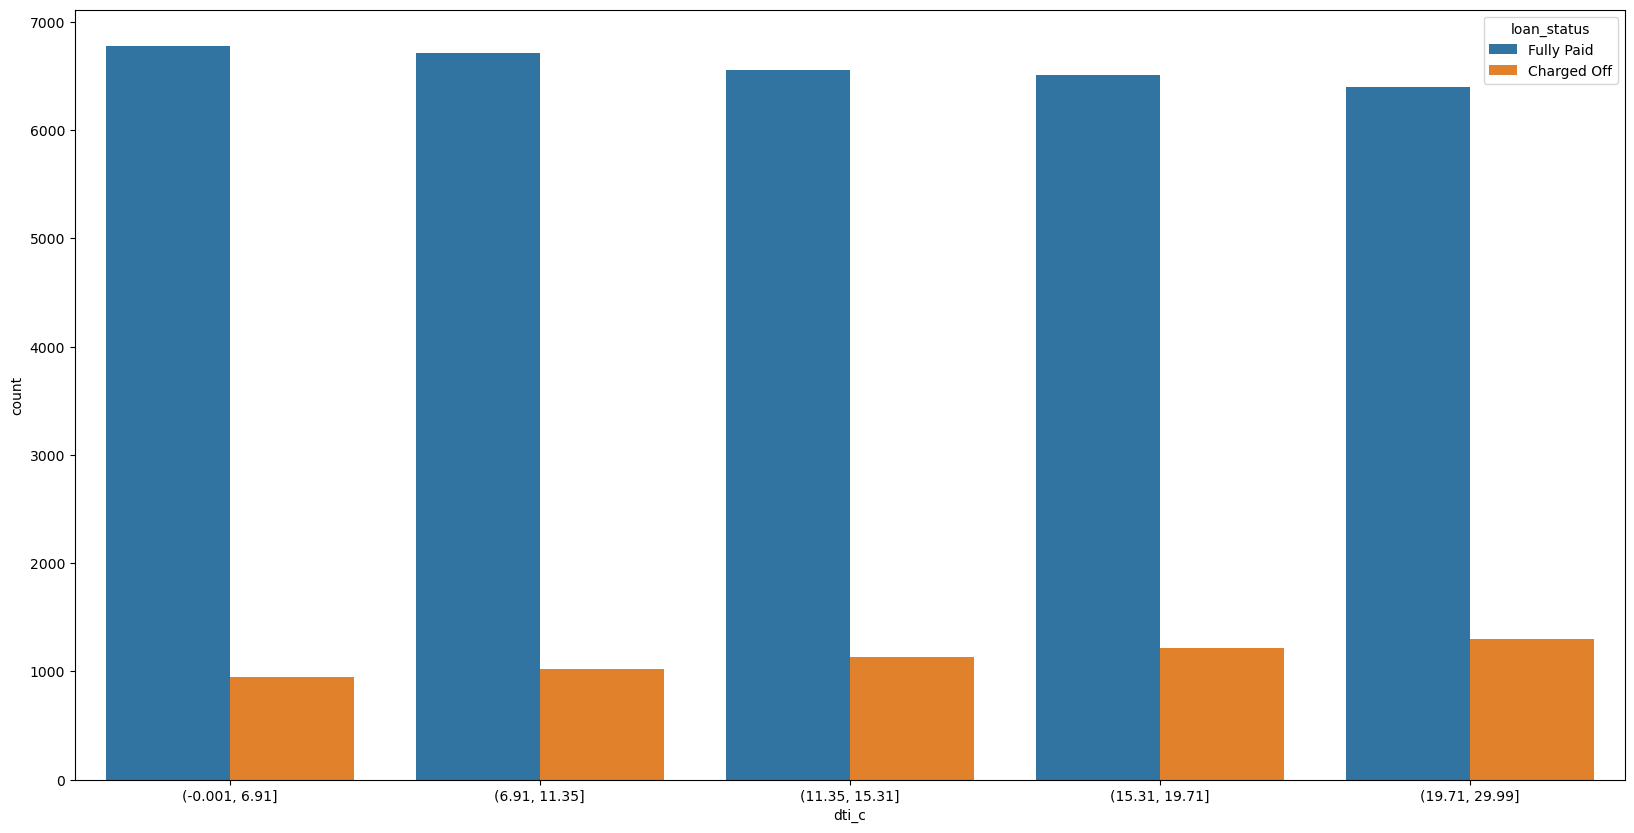

,dti_c,Defaulter%,tot_count
0,"(19.71, 29.99]",16.885310,7699
1,"(15.31, 19.71]",15.790836,7726
2,"(11.35, 15.31]",14.760915,7696
3,"(6.91, 11.35]",13.262668,7736
4,"(-0.001, 6.91]",12.240933,7720


In [379]:
uni_cat_analysis('dti_c')

Observation: As expected higher dti ratio has higher defaulters.

### Revolving Balance

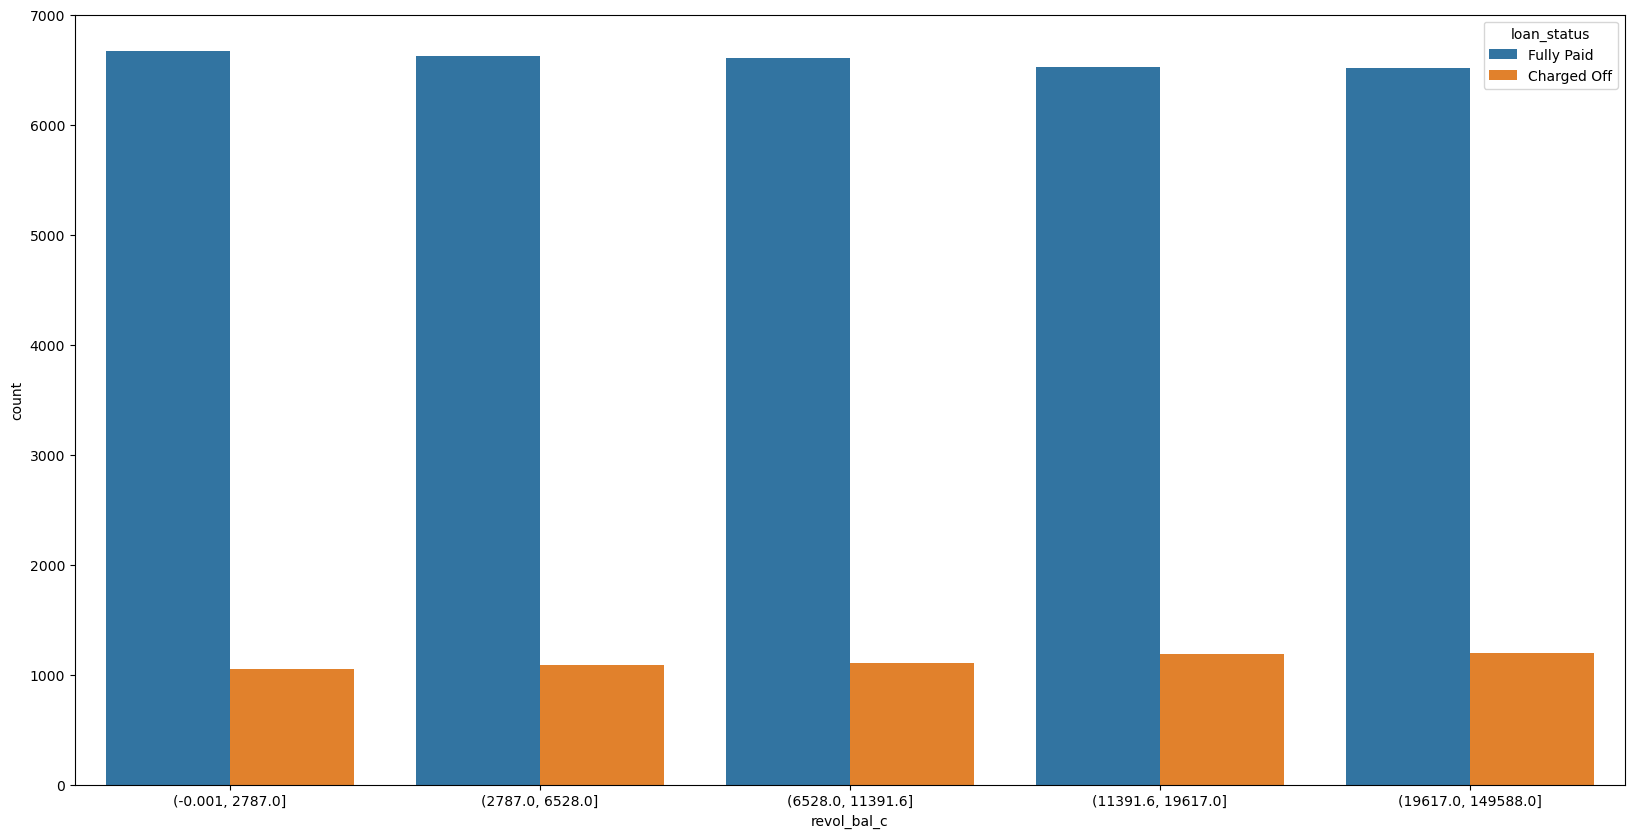

,revol_bal_c,Defaulter%,tot_count
0,"(19617.0, 149588.0]",15.491314,7714
1,"(11391.6, 19617.0]",15.433459,7717
2,"(6528.0, 11391.6]",14.289419,7712
3,"(2787.0, 6528.0]",14.128321,7715
4,"(-0.001, 2787.0]",13.589843,7719


In [380]:
uni_cat_analysis('revol_bal_c')

Observation: Revolving balance not very clear indicator. Slight increase as balance increases.

### Revolving Utilization Rate

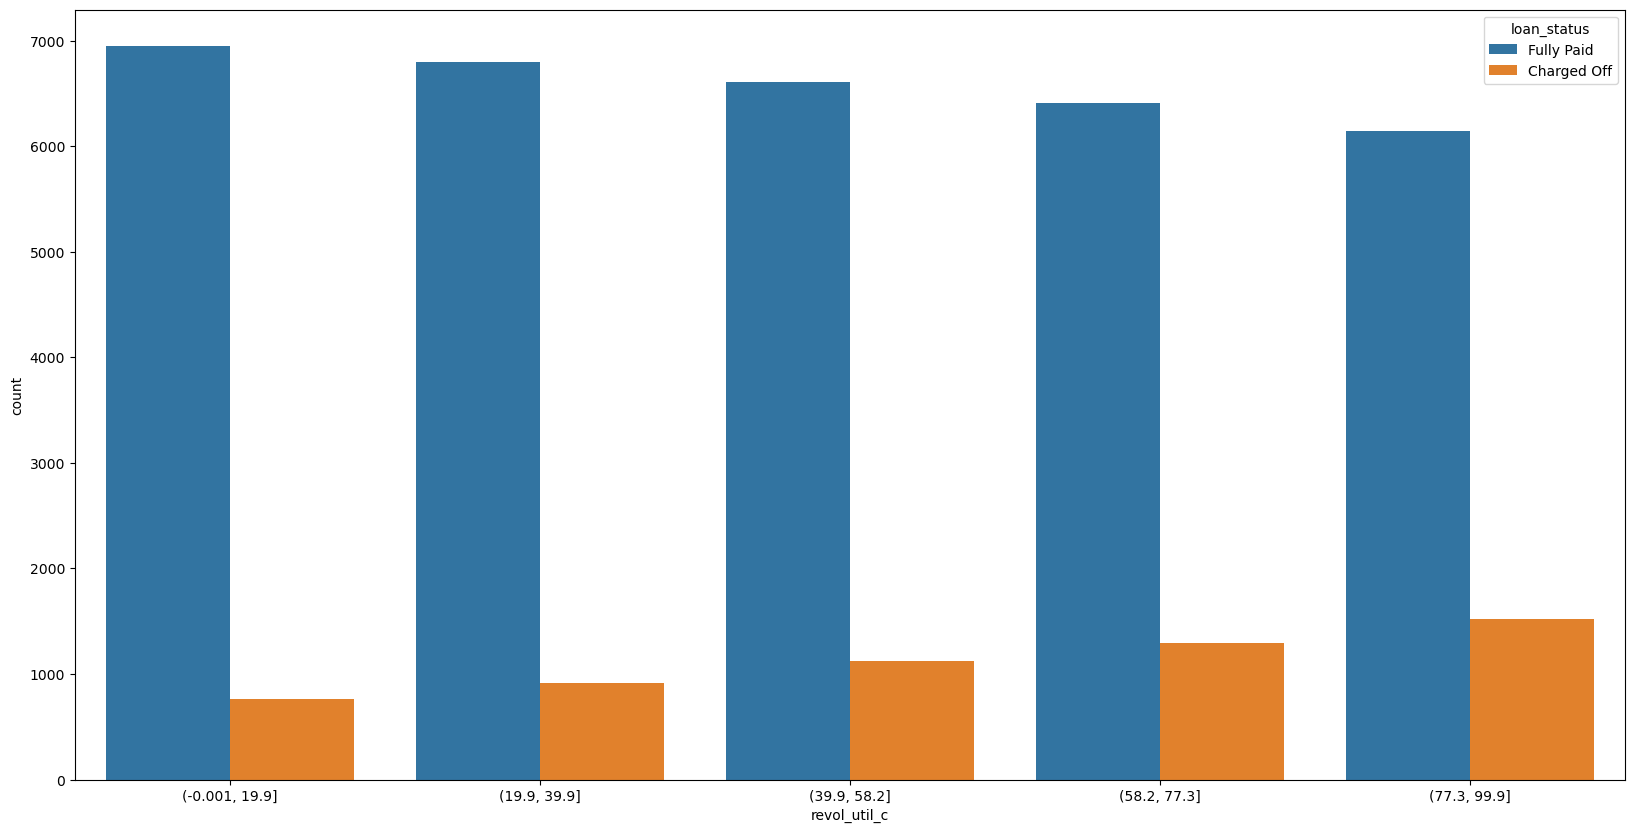

,revol_util_c,Defaulter%,tot_count
0,"(77.3, 99.9]",19.806889,7664
1,"(58.2, 77.3]",16.772686,7703
2,"(39.9, 58.2]",14.500065,7731
3,"(19.9, 39.9]",11.835624,7714
4,"(-0.001, 19.9]",9.941672,7715


In [381]:
uni_cat_analysis('revol_util_c')

Observation: Higher utility rate is definitely an indicator of high defaulters.

### Total Credit Lines

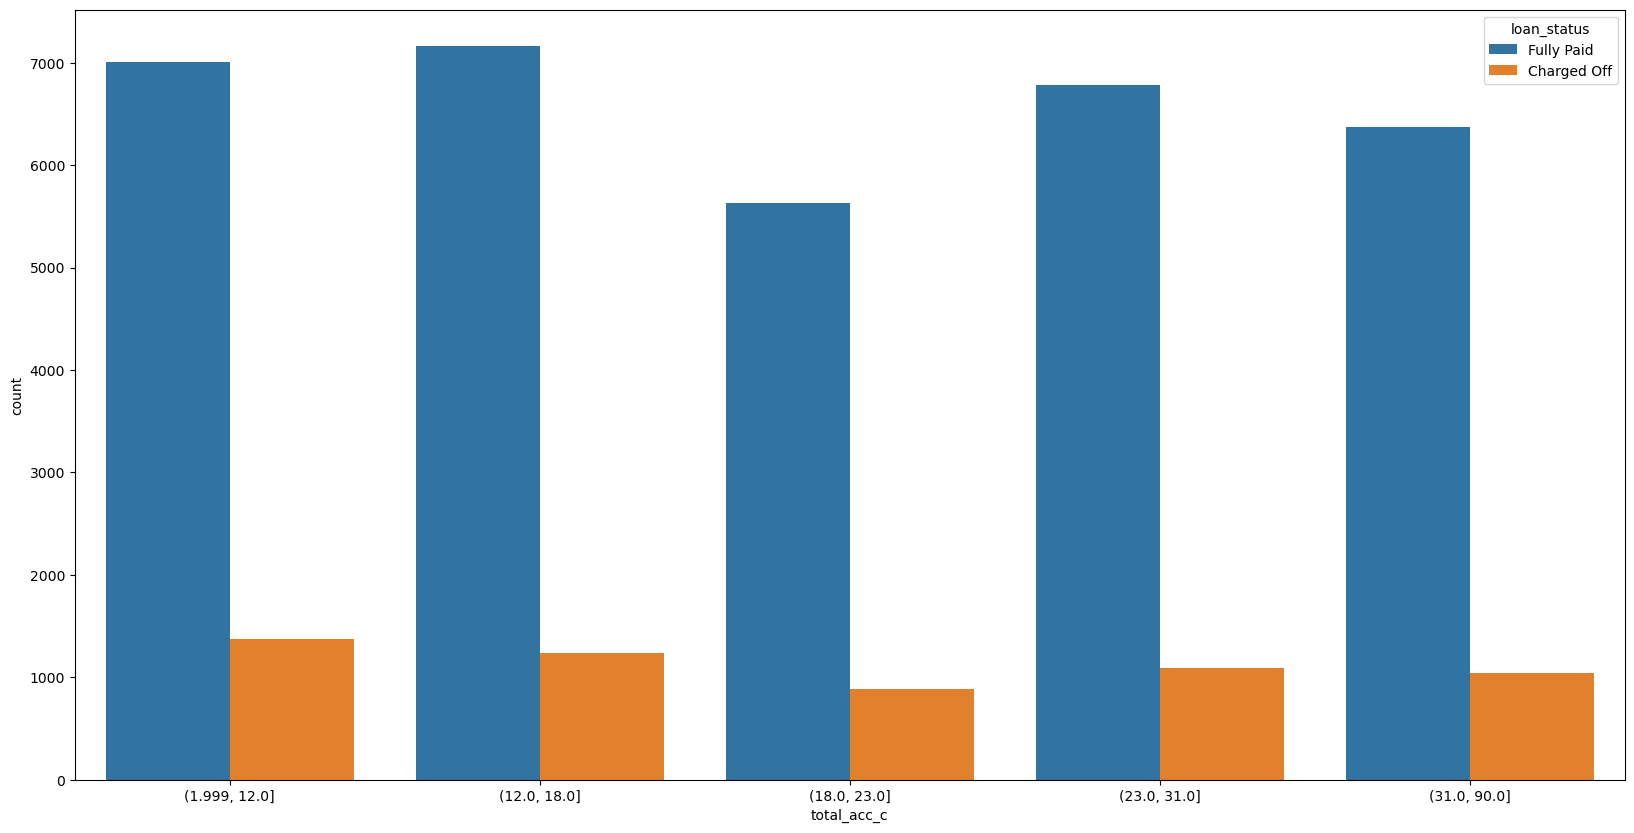

,total_acc_c,Defaulter%,tot_count
0,"(1.999, 12.0]",16.378178,8377
1,"(12.0, 18.0]",14.760148,8401
2,"(31.0, 90.0]",14.089254,7417
3,"(23.0, 31.0]",13.793542,7866
4,"(18.0, 23.0]",13.581952,6516


In [436]:
uni_cat_analysis('total_acc_c')

In [494]:
df_total_acc_ol = df_loan_closed.total_acc.loc[(df_loan_closed['total_acc'] > 2) & (df_loan_closed['total_acc'] < 12)].reset_index()
df_total_acc_ol.total_acc.value_counts()

11    1241
10    1172
9     1056
8      989
7      813
6      674
5      543
4      415
3      179
Name: total_acc, dtype: int64

<Axes: xlabel='total_acc', ylabel='loan_status'>

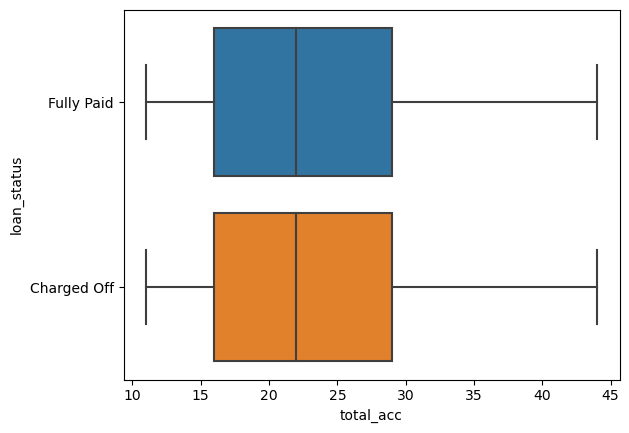

In [498]:
#Removing outlier for total_acc
df_loan_closed_acc_ol = df_loan_closed.loc[(df_loan_closed.total_acc > 10) & (df_loan_closed.total_acc < 45)]
sns.boxplot(x = 'total_acc', y = 'loan_status', data = df_loan_closed_acc_ol)

<Axes: xlabel='total_acc', ylabel='loan_status'>

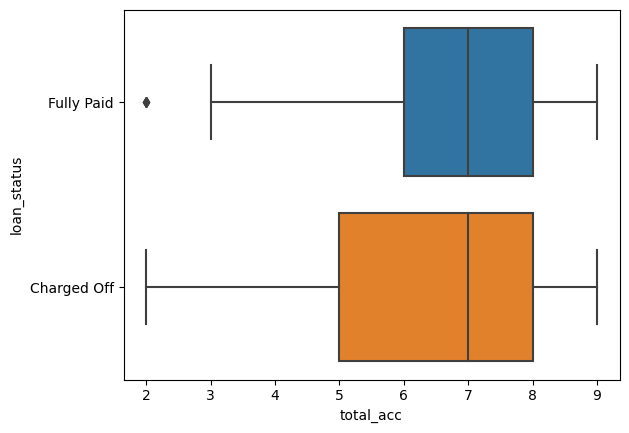

In [497]:
#Only Outliers
df_loan_closed_acc_ol_c = df_loan_closed.loc[(df_loan_closed.total_acc < 10)]
sns.boxplot(x = 'total_acc', y = 'loan_status', data = df_loan_closed_acc_ol_c)

<Axes: xlabel='total_acc', ylabel='loan_status'>

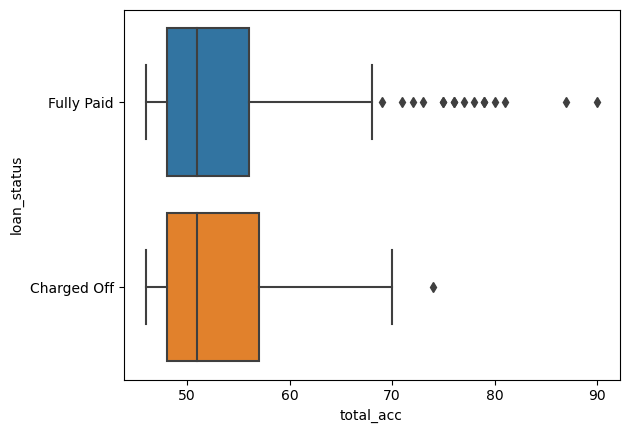

In [468]:
#Only Outliers
df_loan_closed_acc_ol_c = df_loan_closed.loc[(df_loan_closed.total_acc > 45)]
sns.boxplot(x = 'total_acc', y = 'loan_status', data = df_loan_closed_acc_ol_c)

Observation: Defaulters are more in < 10 credit lines.

## Bivariate Analysis

Lets analyse some variables against each other based on patterns observed so far

### Loan Amount against Issue Month Dec to see the pattern

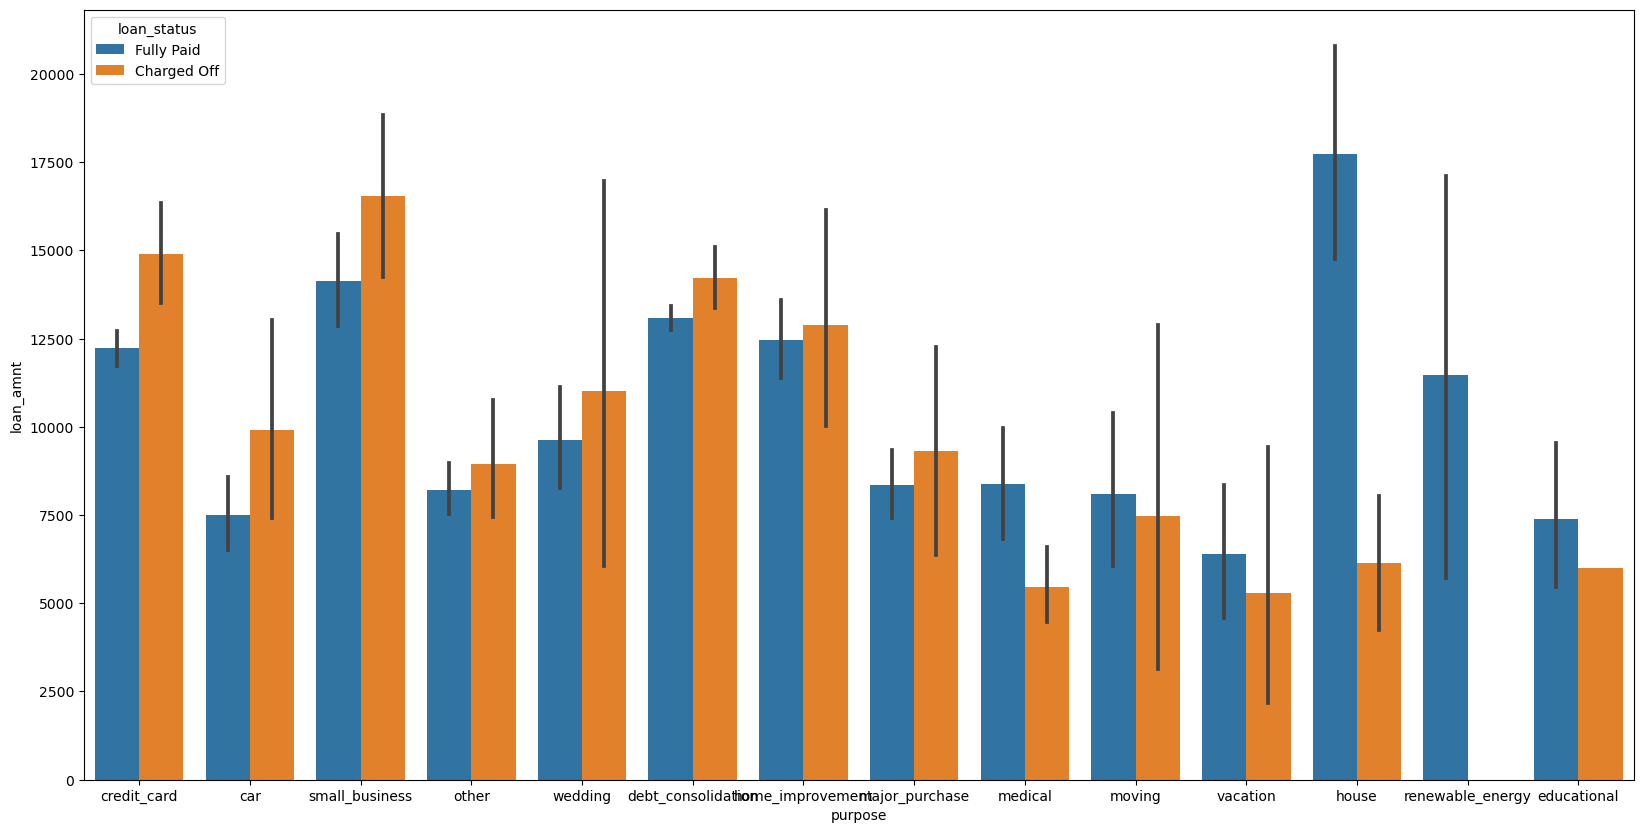

In [542]:
fig, ax = plt.subplots(figsize=(20, 10))
df_loan_closed_purpose = df_loan_closed.loc[(df_loan_closed.issue_month_c == 'Dec')]
sns.barplot(x = 'purpose',y ='loan_amnt',hue = 'loan_status', data = df_loan_closed_purpose)
plt.show()

Observation: Small Business loan continues to stay the most risky in Dec. Credit Card Loans and Car Loans in Dec are risky.

In [581]:
df_loan_closed.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

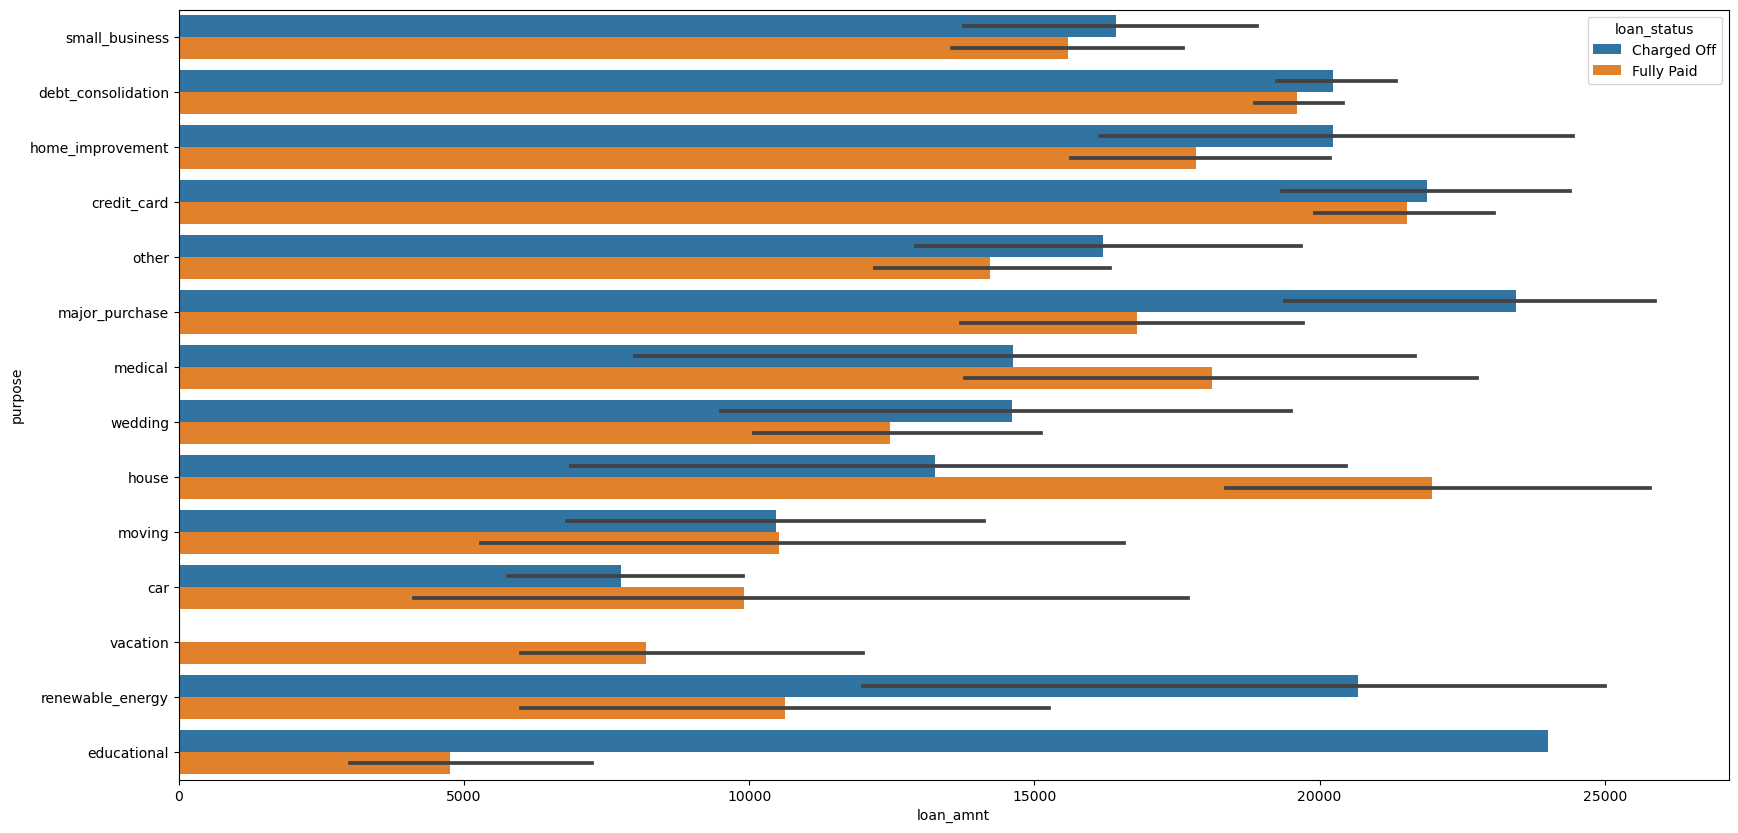

In [601]:
fig, ax = plt.subplots(figsize=(20, 10))
df_loan_closed_purpose = df_loan_closed.loc[(df_loan_closed.grade.isin(['F','G']))]
sns.barplot(y = 'purpose',x ='loan_amnt',hue = 'loan_status', data = df_loan_closed_purpose)
plt.show()

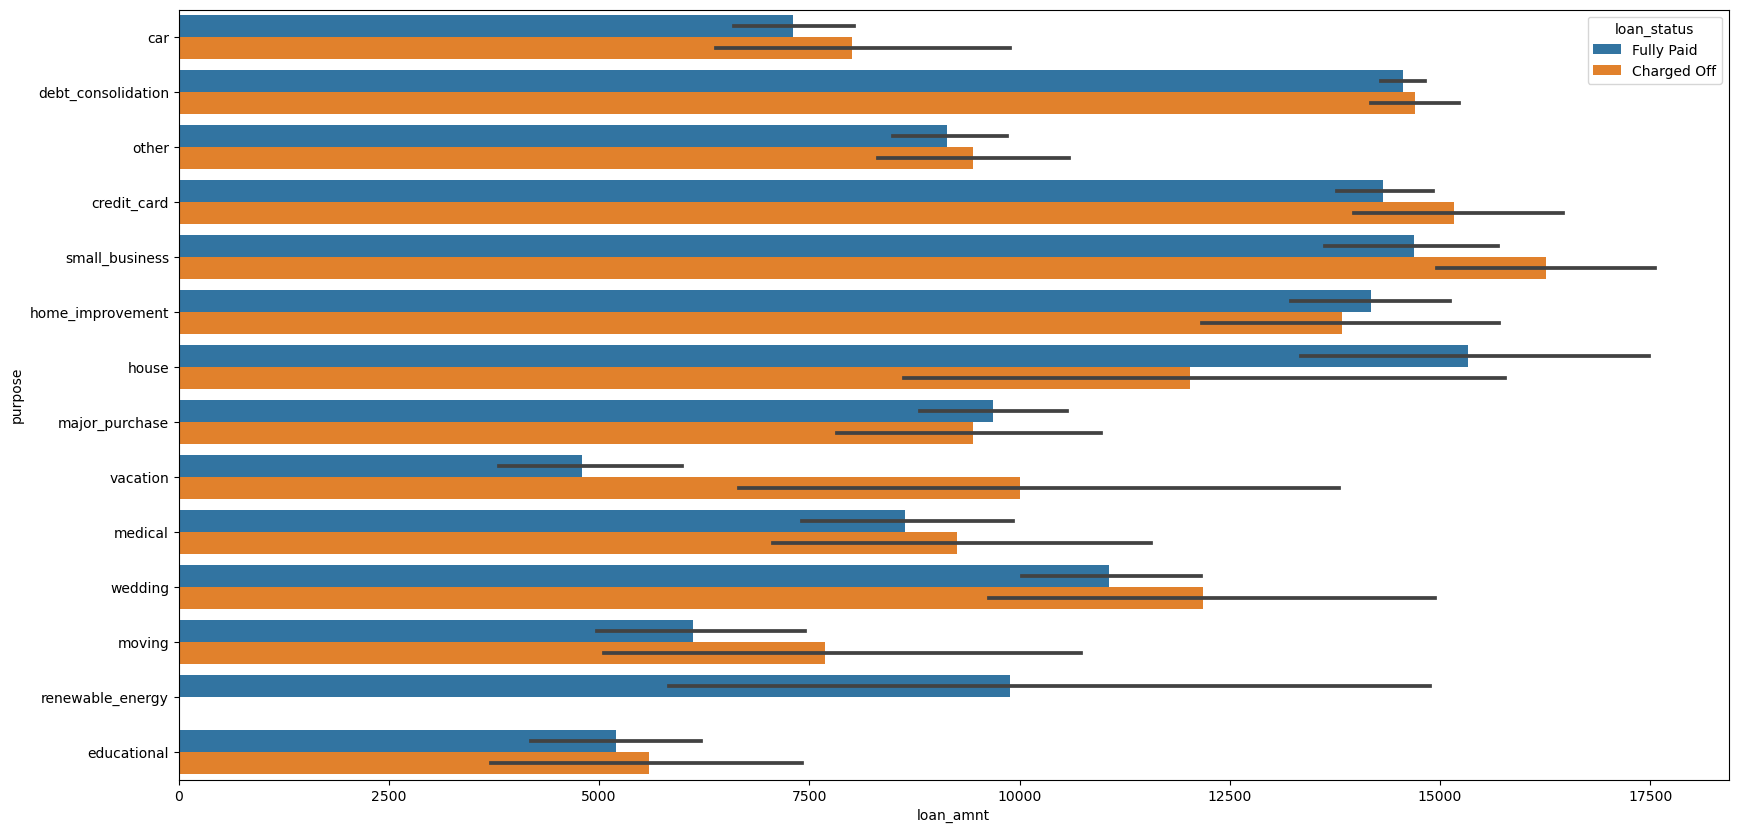

In [608]:
fig, ax = plt.subplots(figsize=(20, 10))
df_loan_closed_purpose = df_loan_closed.loc[(df_loan_closed.grade.isin(['D','E']))]
sns.barplot(y = 'purpose',x ='loan_amnt',hue = 'loan_status', data = df_loan_closed_purpose)
plt.show()

Observation: Moving, wedding and Vacation have higher default rate in the medium grade of loans. D and E. House loans and renewable energy loans are safe.

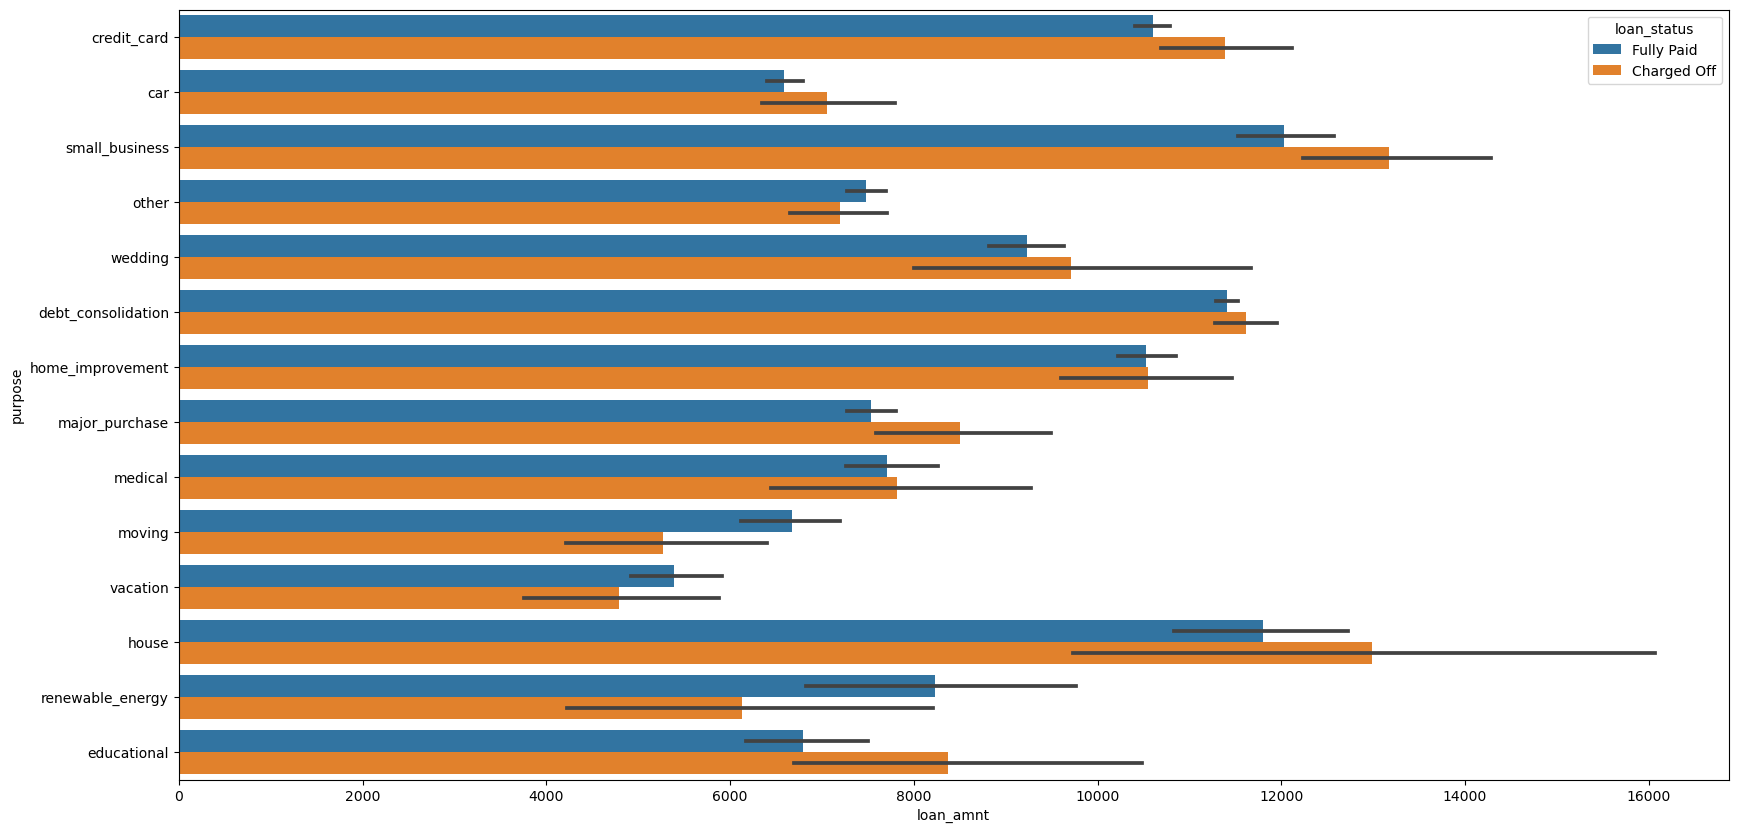

In [609]:
fig, ax = plt.subplots(figsize=(20, 10))
df_loan_closed_purpose = df_loan_closed.loc[(df_loan_closed.grade.isin(['A','B','C']))]
sns.barplot(y = 'purpose',x ='loan_amnt',hue = 'loan_status', data = df_loan_closed_purpose)
plt.show()

Observation: House and Small Business have higher default rate in the lower grade of loans A B and C. Moving loans and renewable energy loans are safe.

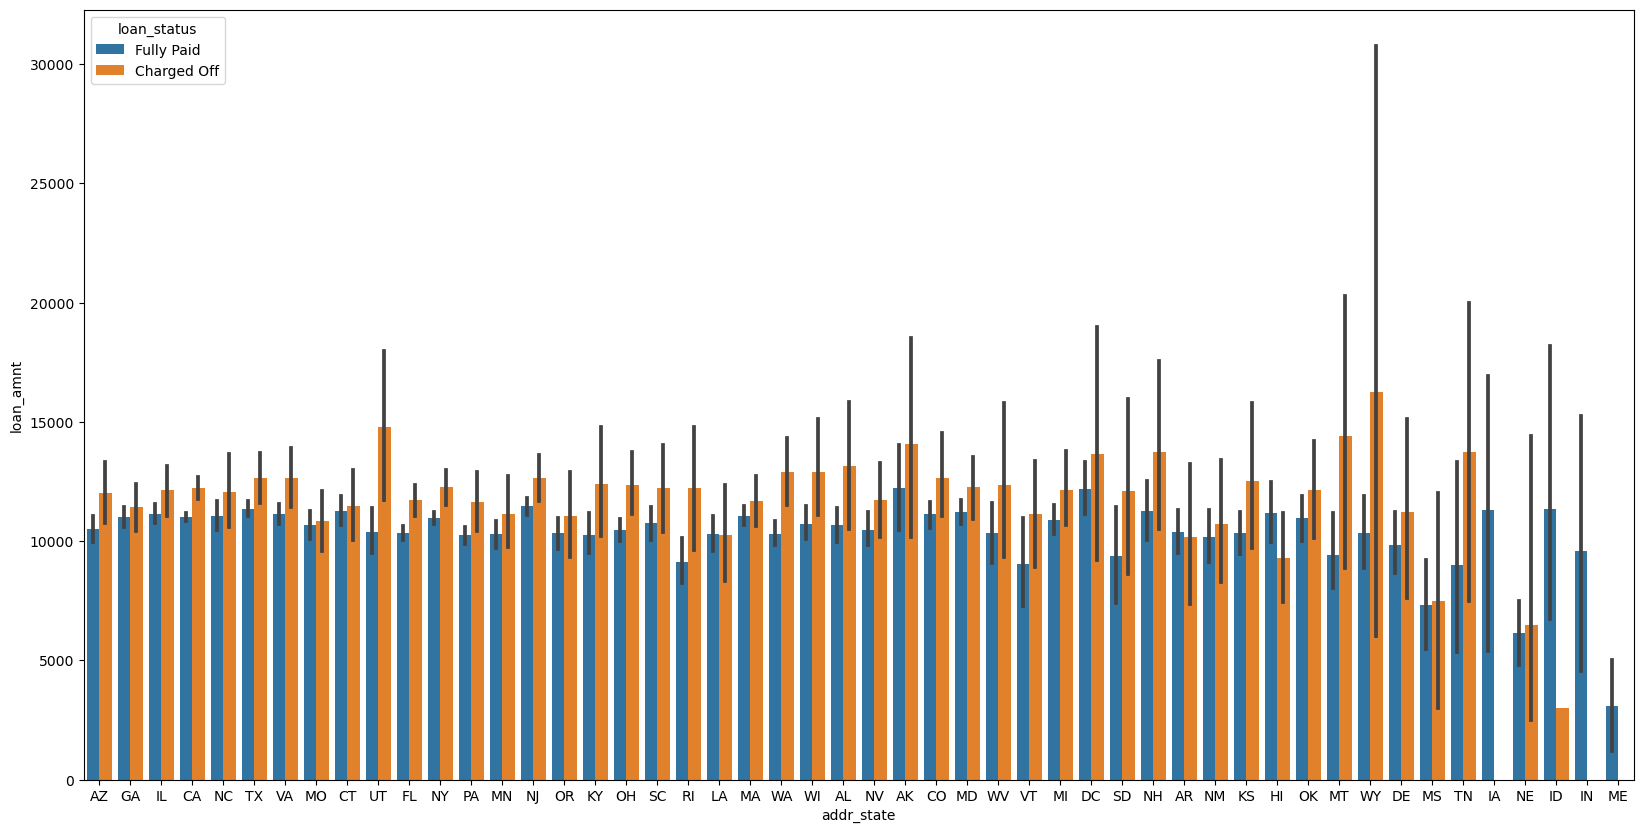

In [640]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(y = 'loan_amnt',x ='addr_state', hue = 'loan_status', data = df_loan_closed)
plt.show()

Observation: WY, MT, UT, TN have higher loan amounts and highest default ratio as well. Lets analyse the purpose of loan for these 4 states.

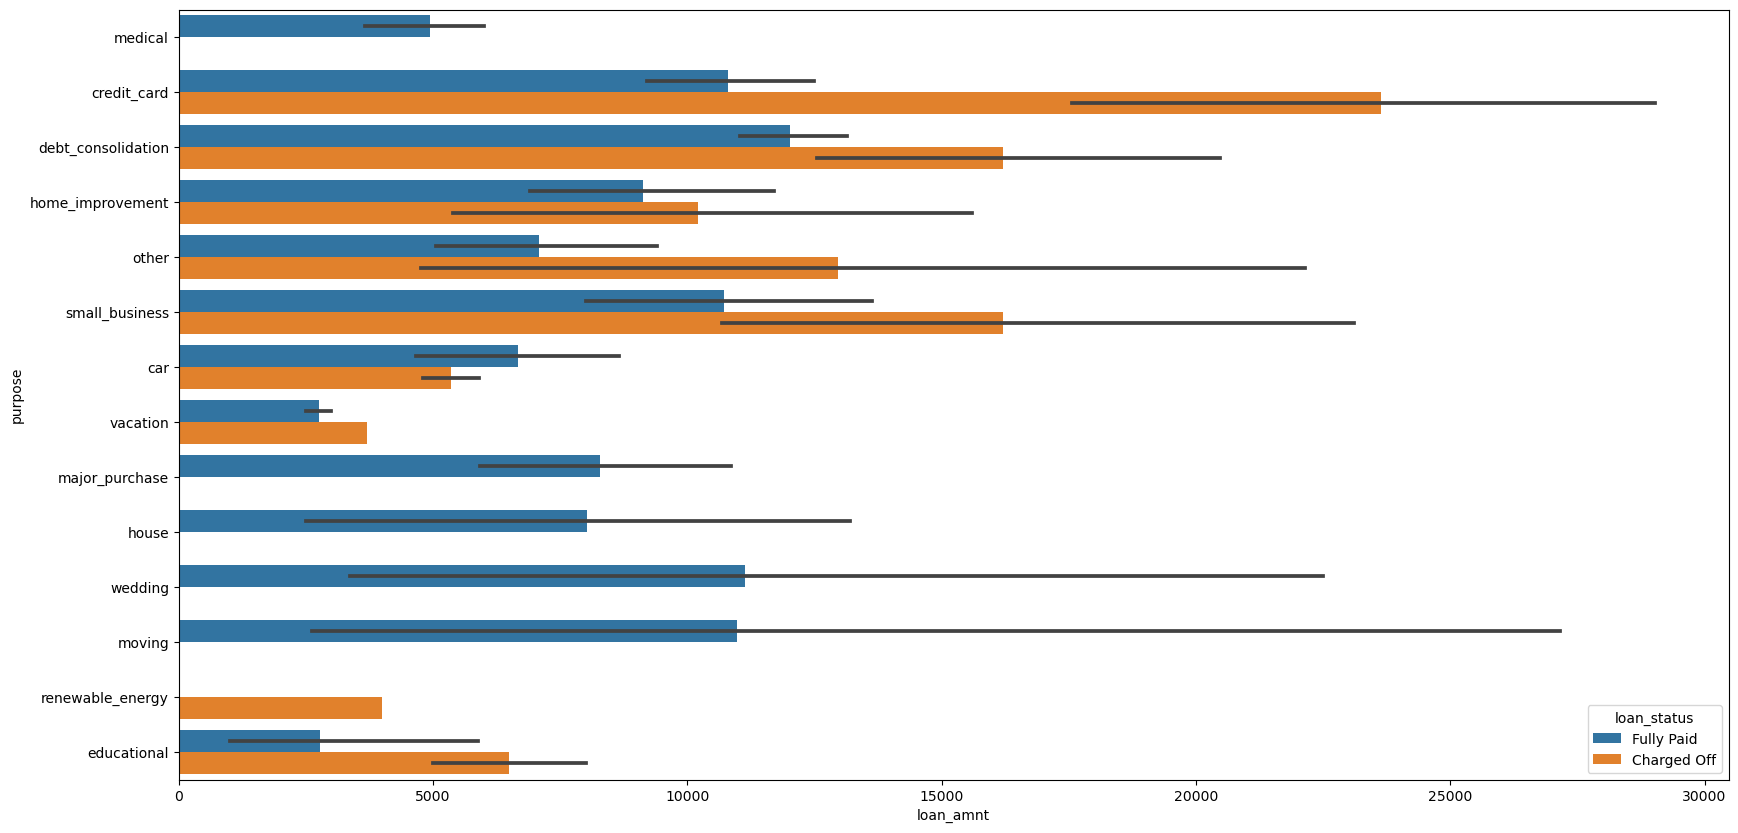

In [646]:
fig, ax = plt.subplots(figsize=(20, 10))
df_loan_closed_state = df_loan_closed.loc[(df_loan_closed.addr_state.isin(['WY','MT','UT','TN']))]
sns.barplot(y = 'purpose',x ='loan_amnt',hue = 'loan_status', data = df_loan_closed_state)
plt.show()

Observation: Maximum loans in these 4 states are credit card with highest default ratio. Small business and debt consolidation loans are also higher amount and high defaut ratio.

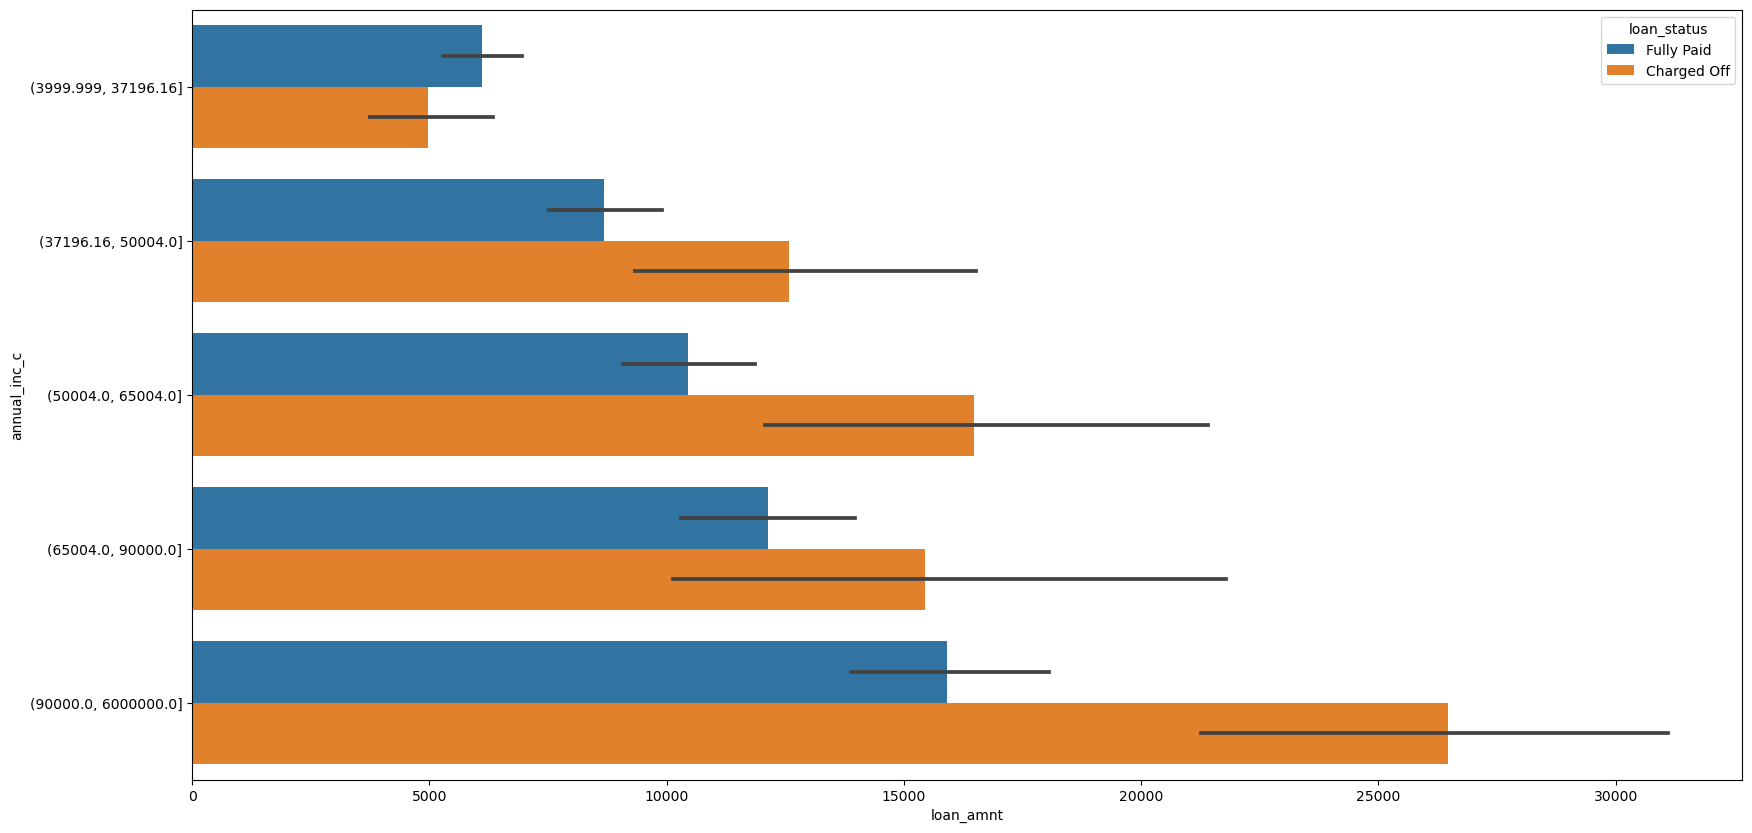

In [647]:
fig, ax = plt.subplots(figsize=(20, 10))
df_loan_closed_state = df_loan_closed.loc[(df_loan_closed.addr_state.isin(['WY','MT','UT', 'TN']))]
sns.barplot(y = 'annual_inc_c',x ='loan_amnt',hue = 'loan_status', data = df_loan_closed_state)
plt.show()

Observation: Interestingly, higher income groups have the highest default ratio. Lets see the interest rate for these states.

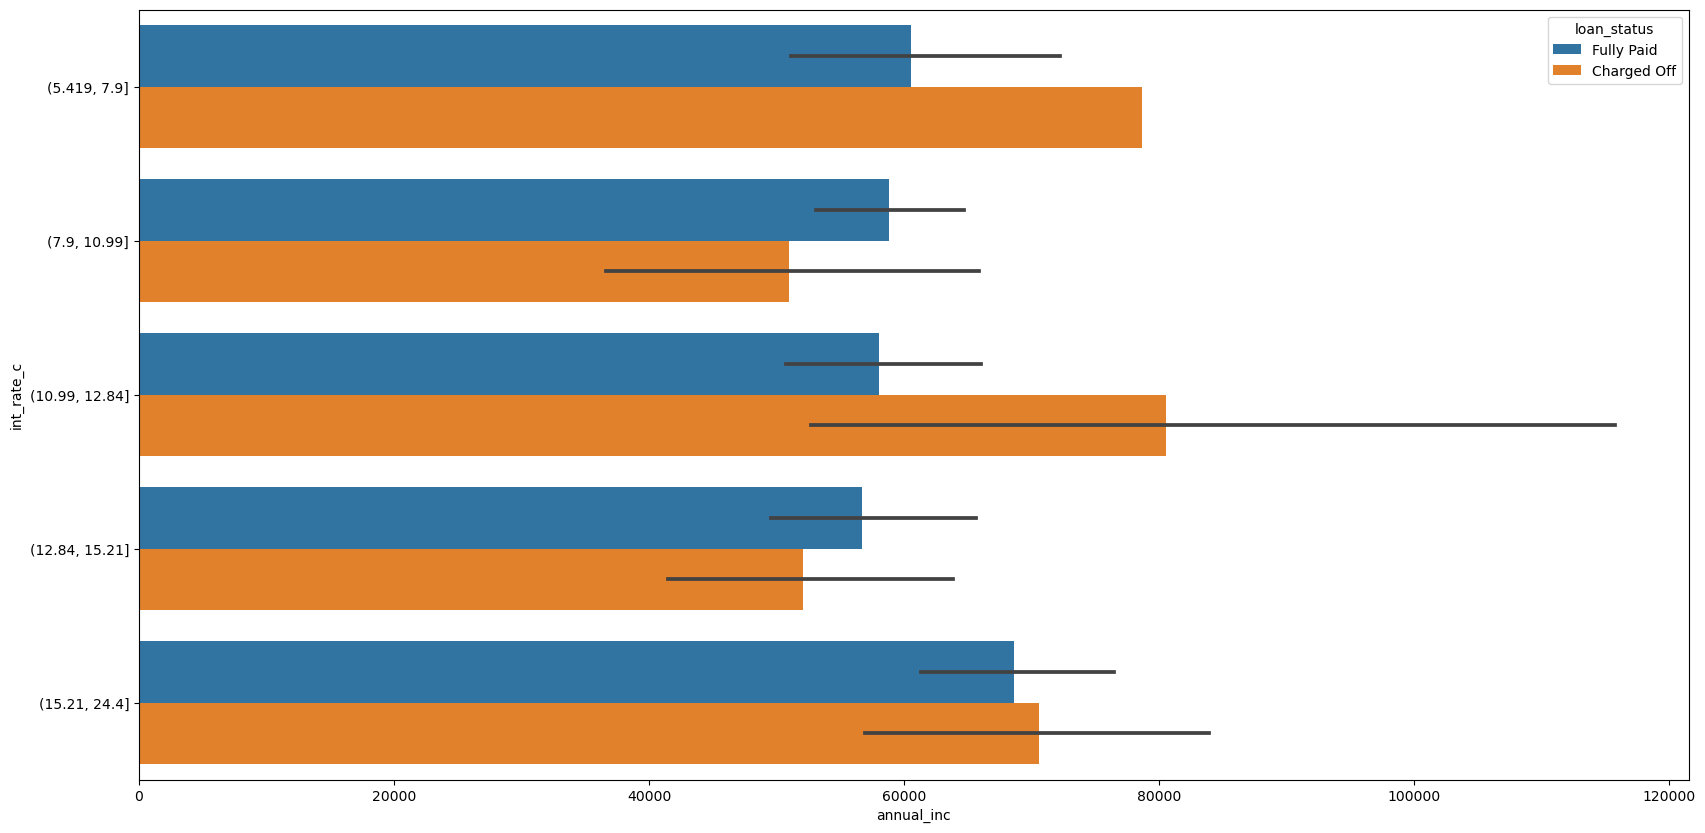

In [649]:
fig, ax = plt.subplots(figsize=(20, 10))
df_loan_closed_state = df_loan_closed.loc[(df_loan_closed.addr_state.isin(['WY','MT','UT','TN']))]
sns.barplot(y = 'int_rate_c',x ='annual_inc',hue = 'loan_status', data = df_loan_closed_state)
plt.show()

Observation: Interestingly interest rate is lower for higher income group and more defaulters than lower and medium income group.

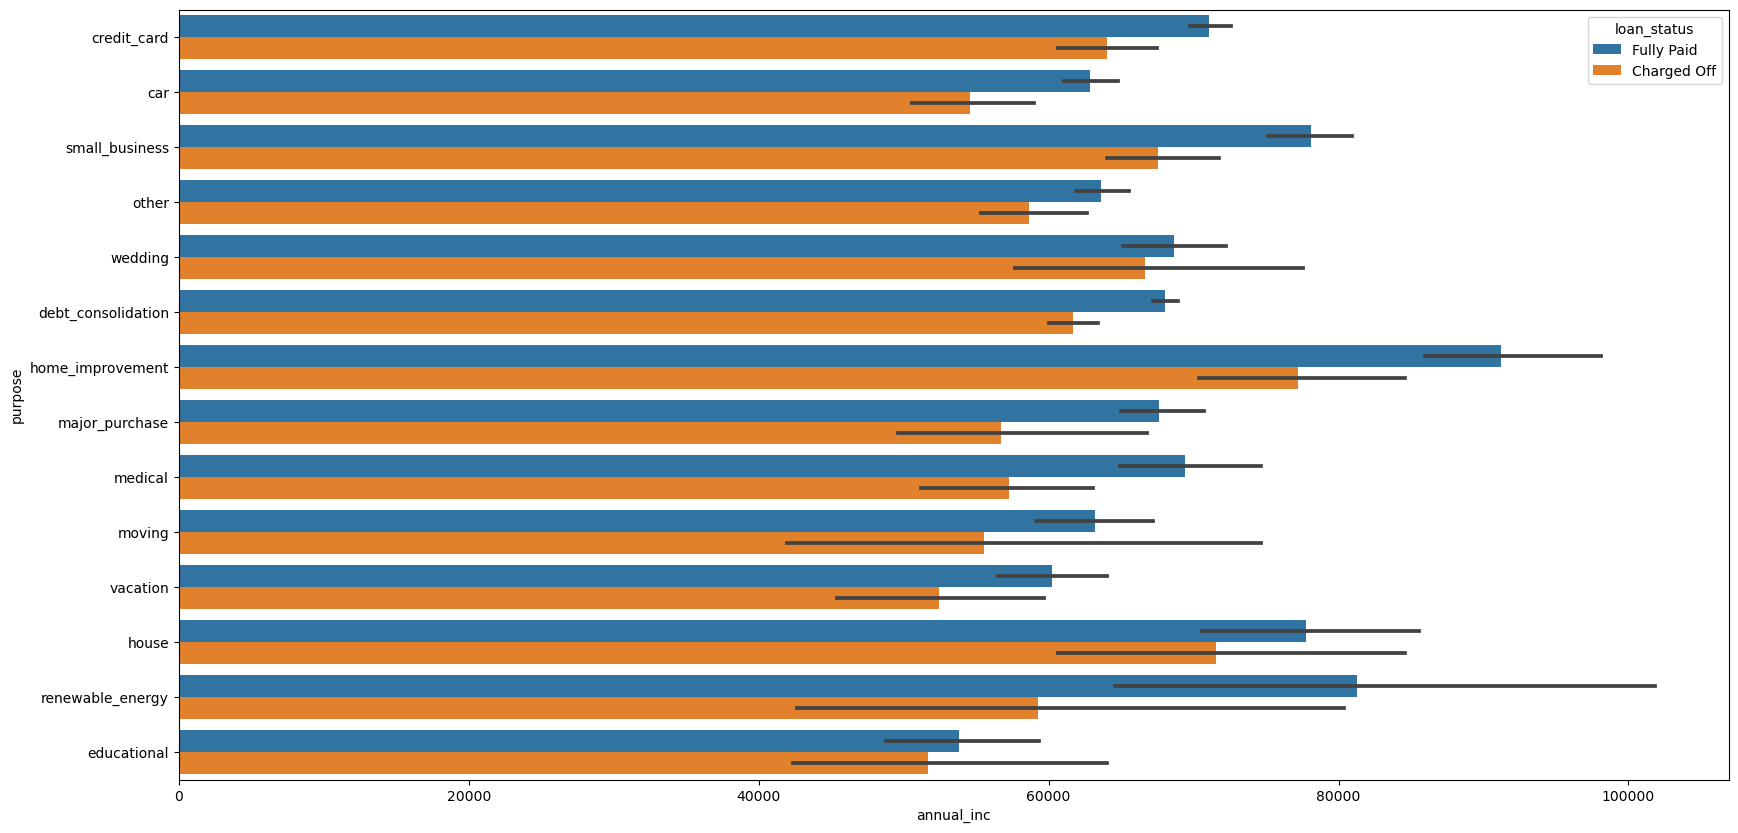

In [654]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = 'annual_inc',y ='purpose',hue = 'loan_status', data = df_loan_closed)
plt.show()

Observation: Home Improvement, Renewable Energy, house loans and debt consolidation loans are higher in higher annual income.

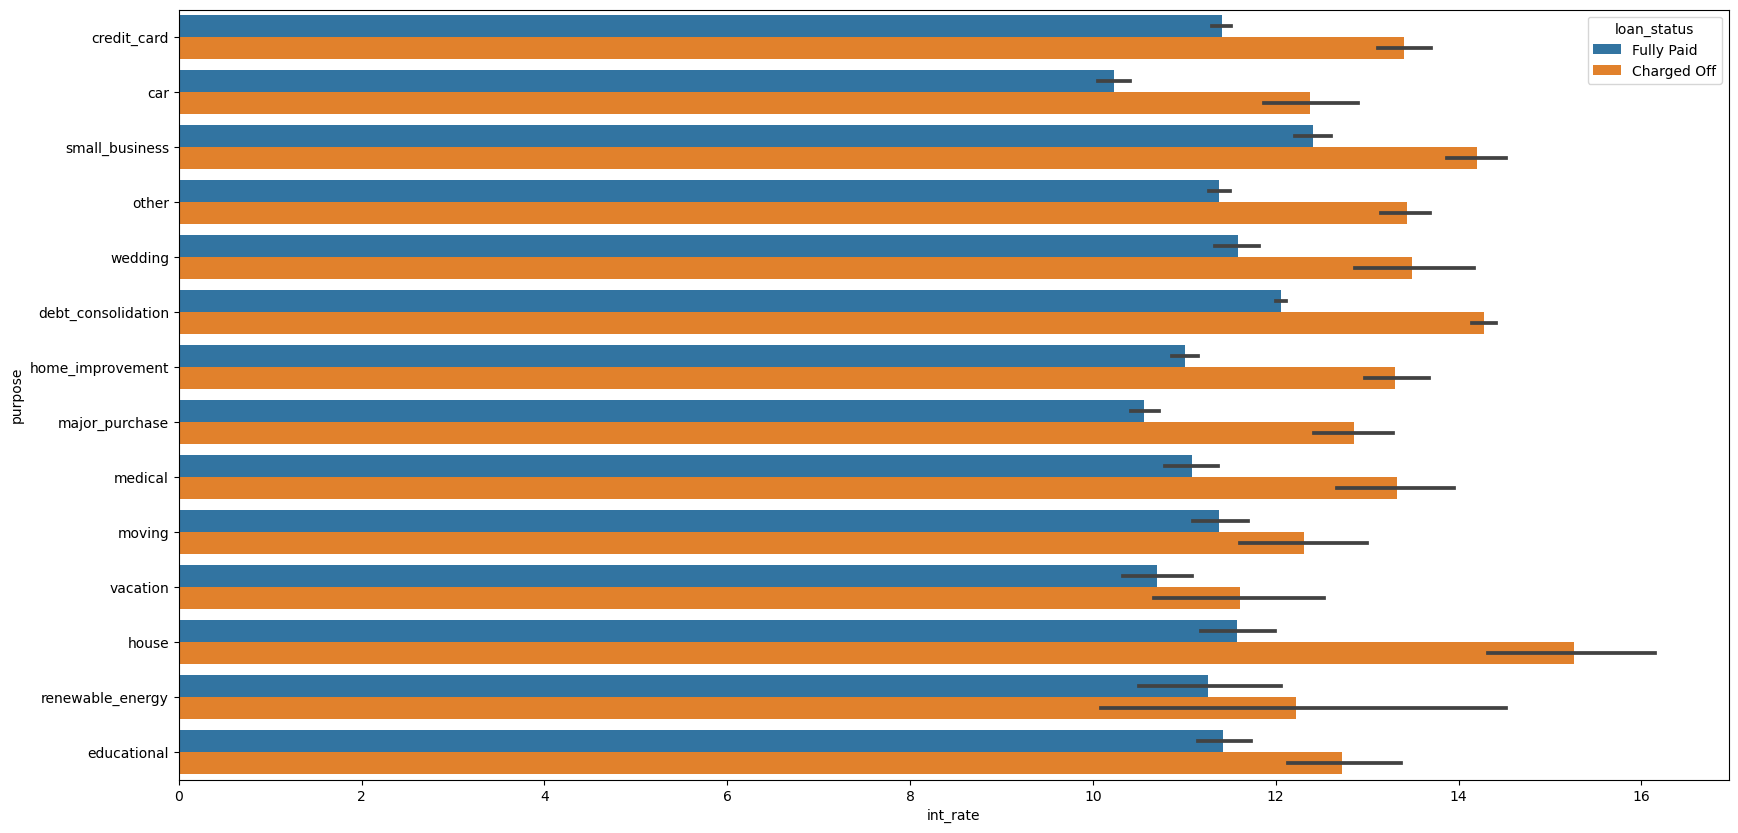

In [656]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = 'int_rate',y ='purpose',hue = 'loan_status', data = df_loan_closed)
plt.show()

Observation: Interest rates in house and debt consolidation and small business loans are high and also default ratio is higher with higher interest rates.

## Observation Summary

Recommendations:

Check on the following things can help:
1. Verification Status - Must make it more stringent
2. Grades - Higher grades risky. Need to check on the kind of loans being provided as per grades.Education and Renewable energy loans risky in high grade.
3. States - 'WY','MT','UT','TN' Credit Card loans in these 4 states are risky. Also interest rates, specially for higher income groups could be increased.
4. Public Record Bankruptcies - Risky for all loans if present.
5. Derogartory Public Records - Risky for all loans if present.
6. Loan Purpose - Small Business, Renewable energy and Educational.
7. Missing employment record risky.
8. Hight debt to income ratio risky.
9. Any deliqunecy is high risk.
10. More number of inquiries are high risk.
